# Results Analysis - <b>Mechanosensing = True || Bell = True</b>


In [2]:
### IMPORT LIBRARIES ###
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import h5py
from mpl_toolkits.mplot3d import Axes3D  
import itertools

### FIGURE STYLE ###
sns.set()
sns.set_style("white")
sns.set_context("notebook")
sns.set_palette("hls", 8)

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

### Storing the results into a DataFrame

In [5]:
### READING THE RESULTS INTO A DATAFRAME ###
path = '0'

# Reading the first results file
f = h5py.File('pstudy.h5', 'r')

# Storing the parameters (kECM and pFA_rev) in a DataFrame
params = pd.DataFrame(0.0, index=range(0, 24), columns=['samp_num','kECM', 'pFA_rev'])

params['samp_num'] = range(0,24)
params['kECM'] = f['results']['params']['kECM']['data'].value
params['pFA_rev'] = f['results']['params']['pFA_rev']['data'].value

data = pd.DataFrame(0.0, index = range(0, 710*24*5), columns = ['time', 'sim_num', 'samp_num', 'kECM', 'pFA_rev', 'nFA', 'lt_FA', 'multFam',
                                                            'rpdFA', 'trac_cell', 'CoM', 'sum_disp', 'diff_disp', 'final_disp', 'abs_disp'])

# Going through all .h5 files to get the results
for m in range(0, 1):
    
    f = h5py.File('pstudy.h5', 'r')
    
    for n in range(0, 24):
        
        data['time'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = np.arange(0, 710*2, 2)
        data['pFA_rev'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = params['pFA_rev'][n]
        data['kECM'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = params['kECM'][n]
        data['sim_num'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = m + 1
        data['samp_num'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = n
    
        data['nFA'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = f['results']['sim_output']['nFA']['data'][n, 0:710]
        data['lt_FA'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = f['results']['sim_output']['lt_FA']['data'][n, 0:710]
        data['multFam'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = f['results']['sim_output']['multFam']['data'][n, 0:710]
        data['rpdFA'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = f['results']['sim_output']['rpdFA']['data'][n, 0:710]
        data['trac_cell'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = f['results']['sim_output']['trac_cell']['data'][n, 0:710]
        data['CoM'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = f['results']['sim_output']['CoM']['data'][:,:,0][n, 0:710]
        
        diff_disp = np.diff(f['results']['sim_output']['CoM']['data'][:,:,0][n, 0:710])*10e5
        cum_sum = np.cumsum(np.diff(f['results']['sim_output']['CoM']['data'][:,:,0][n, 0:710]))*10e5
        
        data['diff_disp'][m*24*710 + (n*710) + 1 : m*24*710 + (n*710) + 710] = diff_disp
        data['sum_disp'][m*24*710 + (n*710) + 1 : m*24*710 + (n*710) + 710] = cum_sum
        data['abs_disp'][m*24*710 + (n*710) + 1 : m*24*710 + (n*710) + 710] = cum_sum
        
        final_disp = np.mean(cum_sum[-5:])
        
        data['final_disp'][m*24*710 + (n*710) : m*24*710 + (n*710) + 710] = final_disp
        
data.head()
        

time  sim_num  samp_num   kECM  pFA_rev    nFA       lt_FA  multFam  rpdFA  \
0   0.0      1.0       0.0  0.001   0.0005  202.0  354.697525      NaN    0.0   
1   2.0      1.0       0.0  0.001   0.0005  206.0  392.442961      1.0    0.0   
2   4.0      1.0       0.0  0.001   0.0005  204.0  438.567647      1.0    0.0   
3   6.0      1.0       0.0  0.001   0.0005  198.0  477.171970      1.0    0.0   
4   8.0      1.0       0.0  0.001   0.0005  172.0  556.399709      1.0    0.0   

     trac_cell      CoM  sum_disp  diff_disp  final_disp  abs_disp  
0    30.084226 -0.00006  0.000000   0.000000   -1.243845  0.000000  
1  7616.860072 -0.00006  0.043349   0.043349   -1.243845  0.043349  
2  9110.385104 -0.00006  0.095256   0.051908   -1.243845  0.095256  
3  9341.902007 -0.00006  0.124245   0.028989   -1.243845  0.124245  
4  8858.591498 -0.00006  0.186070   0.061824   -1.243845  0.186070

## <b>Displacement</b>

/home/ines/python_envs/generic/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


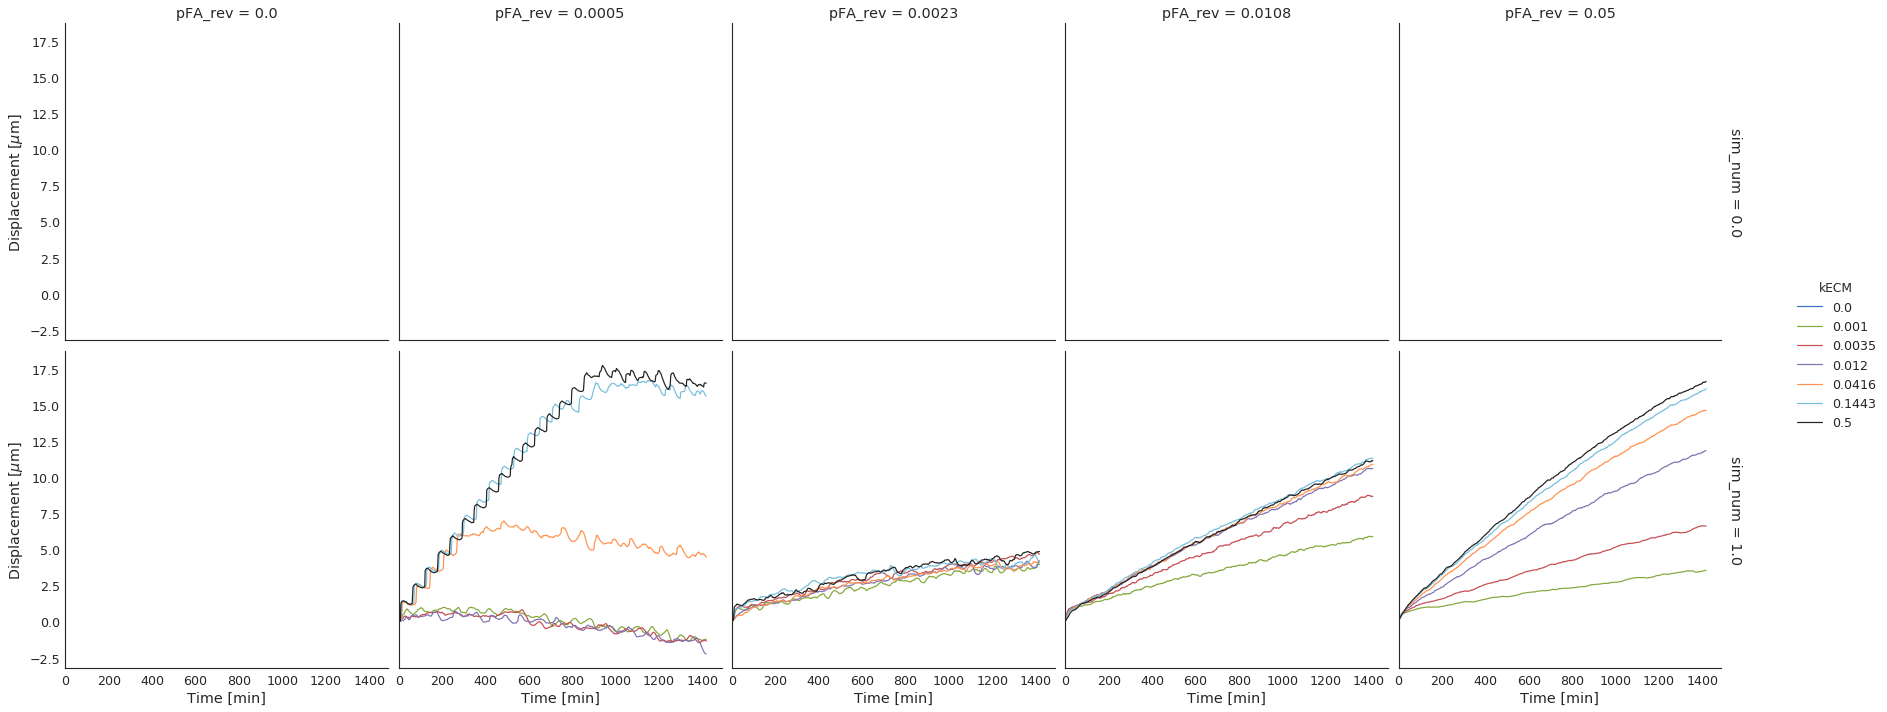

In [6]:
### PLOT DISPLACEMENT - CUMSUM (ALL SIMULATIONS) ###
sns.set_style("white")

g = sns.FacetGrid(data, row = "sim_num", col = "pFA_rev", hue = "kECM", margin_titles = True, size = 5)

g = (g.map(plt.plot, "time", "sum_disp")
    .set(xlim = (0, None))
    .add_legend()
    .set_axis_labels("Time [min]", "Displacement [$\mu$m]"))

/home/ines/python_envs/generic/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


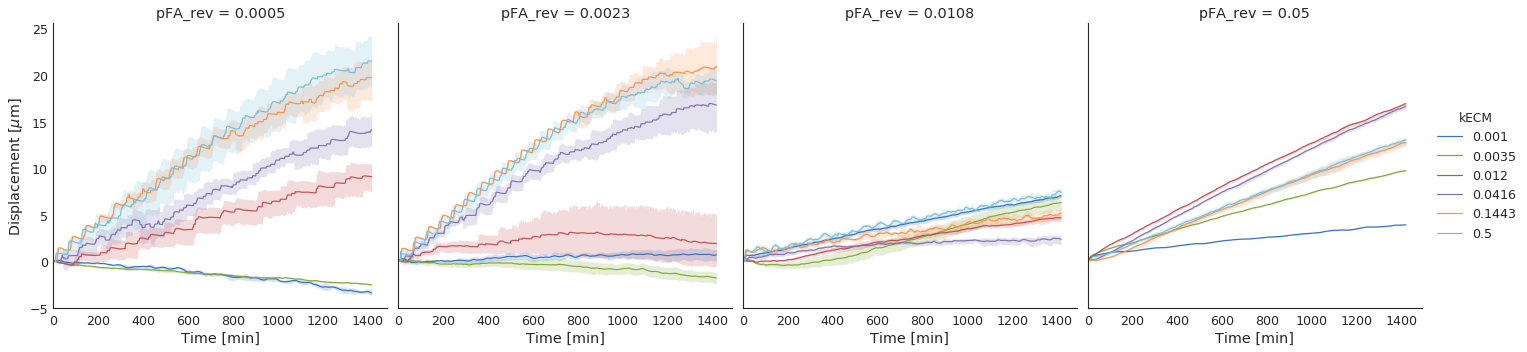

In [38]:
### PLOT DISPLACEMENT - CUMSUM (VARIATION) ###
#sns.set_style("white")
g = sns.FacetGrid(data, col = "pFA_rev", hue = "kECM", size = 5)

g = (g.map(sns.lineplot, "time", "sum_disp")
    .set(xlim = (0, None))
    .add_legend()
    .set_axis_labels("Time [min]", "Displacement [$\mu$m]"))

/home/ines/python_envs/generic/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


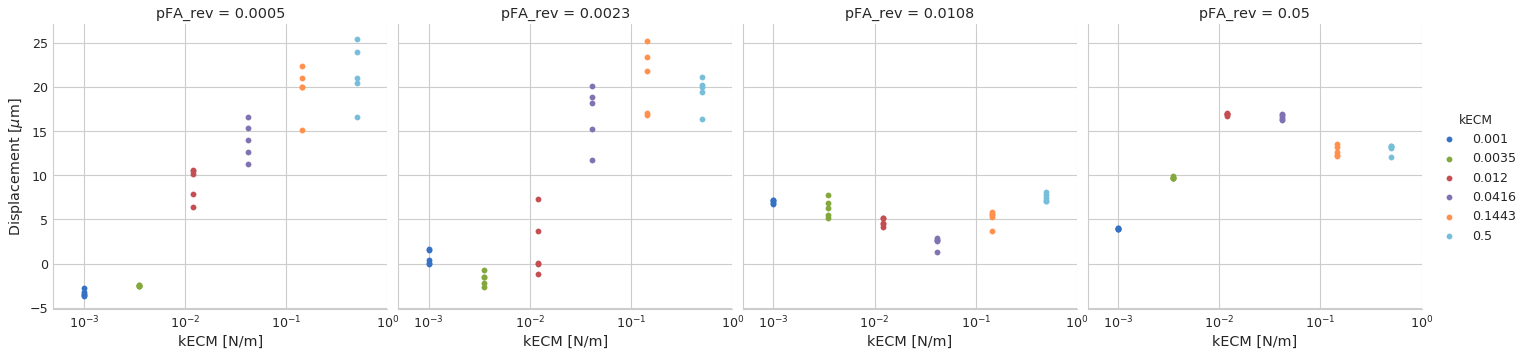

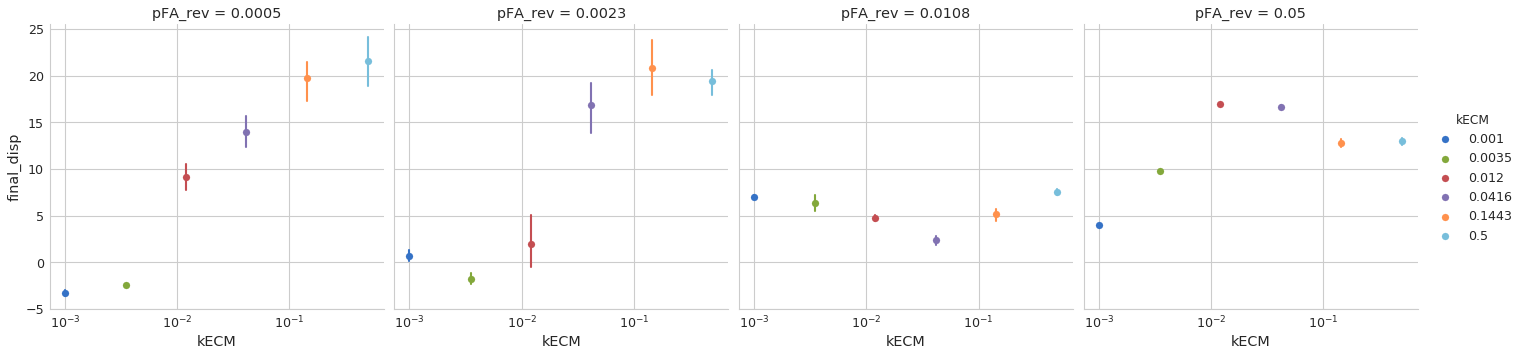

In [5]:
### PLOT DISPLACEMENT - FINAL VALUE ###
sns.set_style("whitegrid")

g = sns.FacetGrid(data[709::710], col = "pFA_rev", hue = "kECM",  size = 5)

g = (g.map(plt.scatter, "kECM", "final_disp")
    .set(xlim = (50e-5, 10e-1))
    .add_legend()
    .set_axis_labels("kECM [N/m]", "Displacement [$\mu$m]")
    .set(xscale = "log"))

ax = sns.lmplot(data = data[709::710], x = "kECM", y = "final_disp", col = "pFA_rev", hue = "kECM", fit_reg = False, x_estimator = np.mean)
plt.xscale('log')
plt.xlim = (50e-5, 10e-1)

# <b>Jumps</b>

<br>

One important piece of information we are trying to retrieve is the <b>data on jumps</b>. Particularly, we want to know:

- <b>Which conditions lead to jumps?</b>
- <b>How many jumps are there in the simulations that do have them?</b>
- <b>How much time passes between jumps?</b>
- <b>Is there dettachment from the substrate for all the jumps?</b>
- <b>How many "negative" jumps are there and do they happen more due to a particular condition?</b>

<br>
 
## <b>Automatic jump detection </b>

<br>

To answer these questions, we will implement a method to automatically detect the jumps, and use that data to compute the metrics we desire. So, let's observe the displacement for a sample with no jumps and another one with jumps and try to understand how we can implement this algorithm.

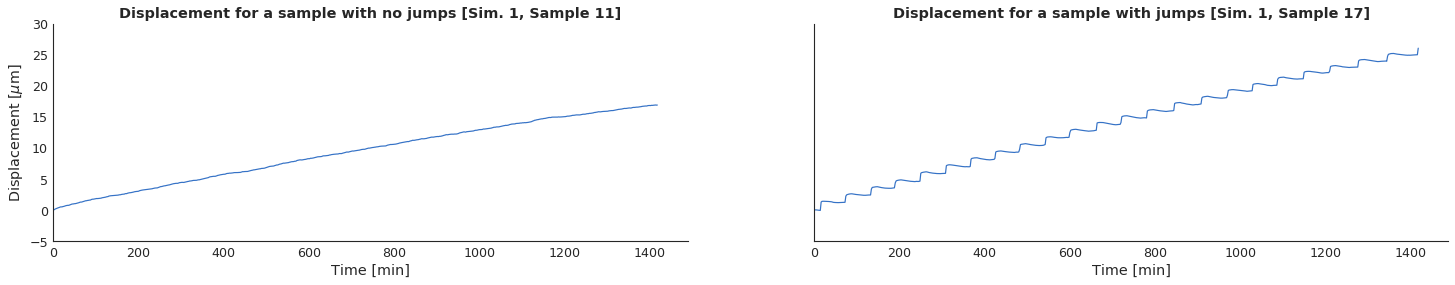

In [48]:
### DISPLACEMENT EXAMPLE PLOT ###
# Figure definition
fig, ax = plt.subplots(1, 2, sharey = True, sharex = True)
fig.set_figwidth(25)

# Plot displacement
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 11], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 11])
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 17], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 17])

# Figure aesthetics
ax[0].set_ylim(-5, 30)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, None)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
ax[0].set_title('Displacement for a sample with no jumps [Sim. 1, Sample 11]', weight = 'bold')
ax[1].set_title('Displacement for a sample with jumps [Sim. 1, Sample 17]', weight = 'bold')
sns.despine(fig)

For the sample with <b>no jumps</b>, the displacement curve seems pretty smooth, meaning that, from one timestep to another, <b>there is not a large difference in displacement</b>. For the sample <b>with jumps</b>, on the other hand, when a jump occurs there is an <b>abrupt change in displacement</b>. Thus, we can look into the displacement differences plot and detect the peaks in order to quantify the jumps, as demonstrated in the example below:

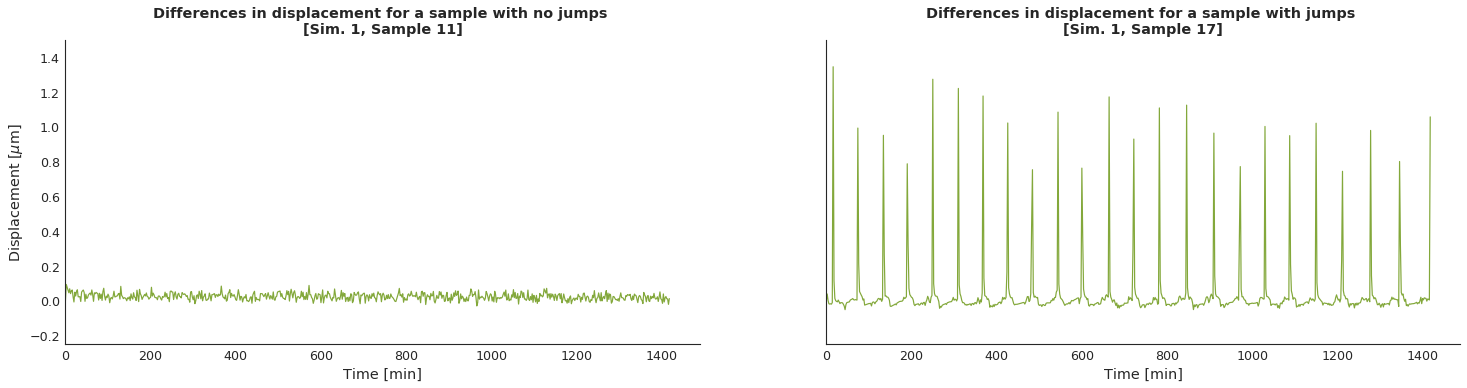

In [20]:
### DISPLACEMENT DIFFERENCES EXAMPLE PLOT ###
# Figure definition
fig, ax = plt.subplots(1, 2, sharey = True, sharex = True)
fig.set_figwidth(25)

# Plot displacement differences
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 11], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == 11], color = 'C1')
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 17], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == 17], color = 'C1')

# Figure aesthetics
ax[0].set_ylim(-.25, 1.5)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, None)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
ax[0].set_title('Differences in displacement for a sample with no jumps \n[Sim. 1, Sample 11]', weight = 'bold')
ax[1].set_title('Differences in displacement for a sample with jumps \n[Sim. 1, Sample 17]', weight = 'bold')
sns.despine(fig)

Overlapping both charts, we confirm that the peaks correspond to the jumps. Therefore, we can define a <b>minimum value</b> (observing the previous plot, .5 seems like a reasoanble value) and define that, if we have a difference value above that limit, the corresponding time value should be considered as a jump. It must be noted that this minimum value should be compared to the absolute value of the differences, as there may be a jump in the opposite direction, but that should still be considered as a jump.

Nevertheless, not all samples are as straightforward and well-defined as the samples chosen as examples. Some have abrupt changes in displacement that do not correspond to jumps, while others have jumps that do not reach the .5 threshold. Thus, it is important to look into all the samples and visualize confirm that the "jumps" that are being detected make sense. Let's start with simulation 1.

<br>

<b>Simulation 1</b>

Besides the plots, we will be <b>outputting some metrics on the jumps</b> (which will also be stored in a DataFrame, to ease calculations and visualization), as well as <b>storing the time values</b> for the jumps of each sample in a dictionary, so that they can be accessed later on.


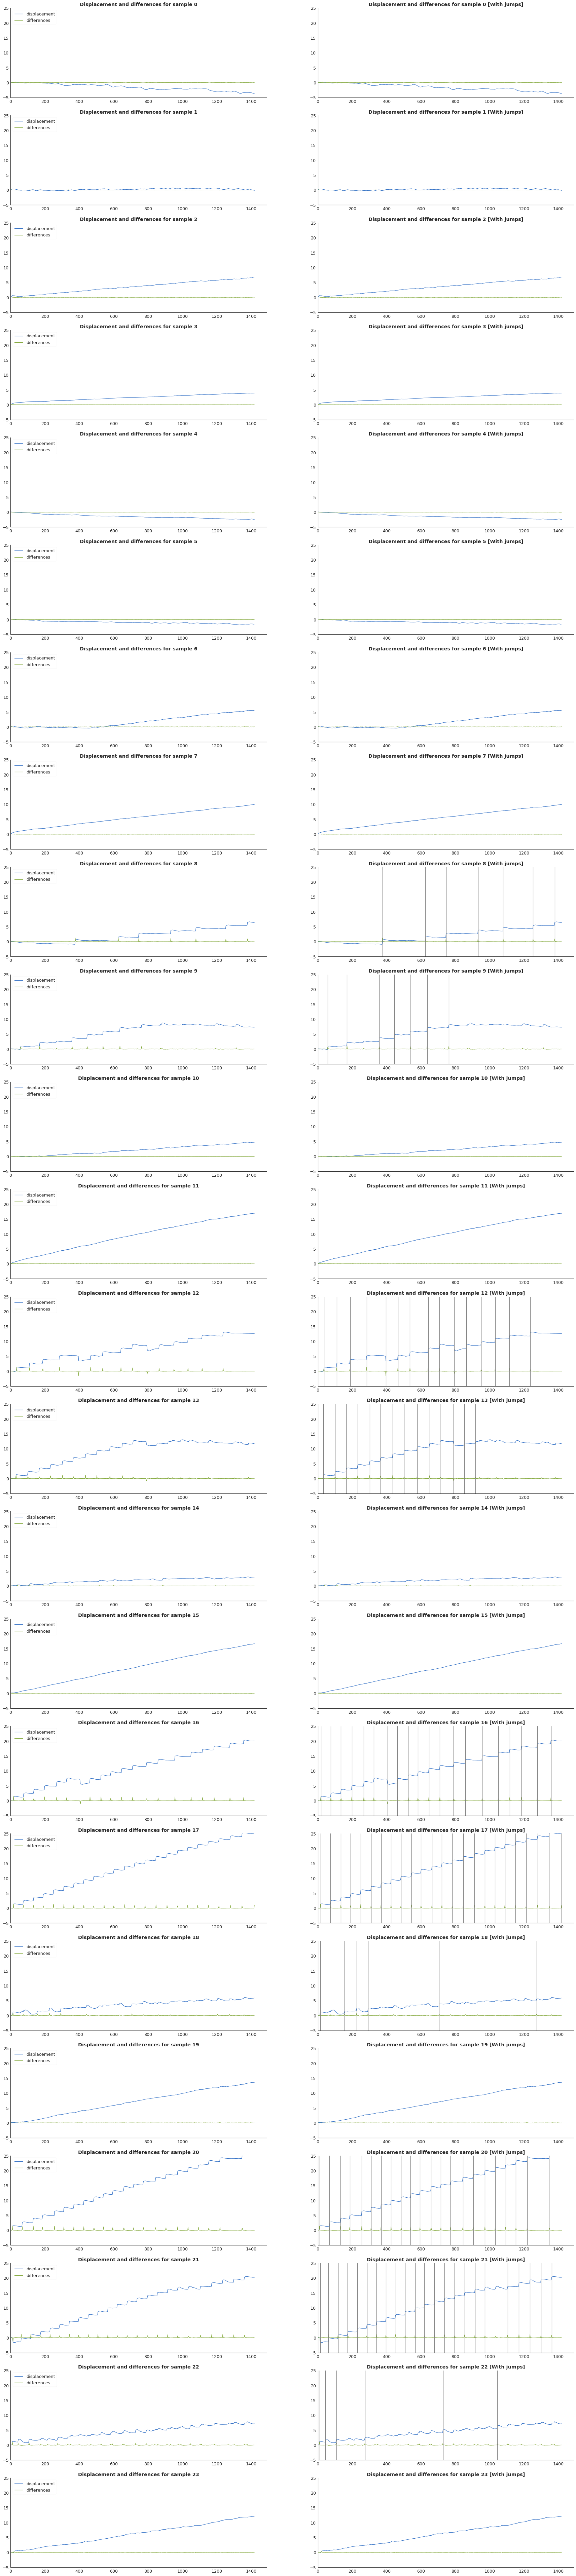

In [102]:
### PLOT JUMPS FOR ALL SAMPLES ###
# Set the minimum difference in displacement to be considered a jump
jump_min = 5e-1

# Set variable for sample number
count = 0

# Figure definition
fig, ax = plt.subplots(24, 2)
fig.set_figheight(140)
fig.set_figwidth(30)
sns.set_style("white")

# Going through all samples to plot the differences, displacement and jumps
for n in range(0, 4):
    
    for m in range(0,6):
        
        # Plot displacement and differences
        ax[count, 0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == count], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == count], label = 'displacement')
        ax[count, 0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == count], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == count], label = 'differences')
        ax[count, 1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == count], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == count])
        ax[count, 1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == count], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == count])
        
        # Get time values for the jumps
        jumps = data['time'][data['sim_num'] == 1][data['samp_num'] == count][abs(data['diff_disp']) > jump_min]
        
        # Remove duplicates that are considered as peaks (keep the first value) - some "peaks" consist of two small peaks close to each other, but
        # they should not be seen as two separate peaks, so the second value is disconsidered
        for j in range(1, np.size(jumps)):
            
            # Check if value is too close to the previous one 
            if jumps.iloc[j - 1] > jumps.iloc[j] - 5:
                
                # Set it as 0 to be removed
                jumps.iloc[j] = np.nan
            
        # Remove the NaN defined before (second peak values)
        jumps = jumps.dropna()
        
        # Plot jumps as vertical lines
        for jump in jumps:
            
            ax[count, 1].axvline(jump, color = 'gray')
        
        # Figure aesthetics
        ax[count, 0].legend(loc = "upper left")
        ax[count, 0].set_ylim(-5, 25)
        ax[count, 1].set_ylim(-5, 25)
        ax[count, 0].set_title('Displacement and differences for sample ' + str(count), weight = 'bold')
        ax[count, 1].set_title('Displacement and differences for sample ' + str(count) + ' [With jumps]', weight = 'bold')
        ax[count, 0].set_xlim(0, None)
        ax[count, 1].set_xlim(0, None)
        
        # Increment sample counter
        count += 1
        
sns.despine(fig)

In [46]:
### GET ON INFORMATION ON JUMPS ###
# Set the minimum difference in displacement to be considered a jump
jump_min = 5e-1

# Set variable for sample number
count = 0

# Define if you want to print the information on jumps or just store it in a DataFrame (if printed, the results will still be stored)
printInfo = True

# Define dictionary to store the time values for the jumps of each sample
sim_1_jumps = {}

# Define DataFrame to store general information on the jumps for each sample
jumps_info = pd.DataFrame(np.nan, index = range(0, 24*5), columns = ['sim_num', 'samp_num', 'jump_num', 'first_jump', 
                                                                     'jump_time_mean', 'jump_time_std', 'dtch_jump_num'])

# Going through the samples to store (and print) information on jumps
for n in range(0, 4):
    
    for m in range(0,6):
        
        # Get jumps for each sample
        jumps = data['time'][data['sim_num'] == 1][data['samp_num'] == count][abs(data['diff_disp']) > jump_min]
        
        # Remove duplicates that are considered as peaks (keep the first value) - some "peaks" consist of two small peaks close to each other, but
        # they should not be seen as two separate peaks, so the second value is disconsidered
        for j in range(1, np.size(jumps)):
            
            # Check if value is too close to the previous one 
            if jumps.iloc[j - 1] > jumps.iloc[j] - 5:
                
                # Set it as 0 to be removed
                jumps.iloc[j] = np.nan
            
        # Remove the NaN defined before (second peak values)
        jumps = jumps.dropna()
        
        # Store the jump information in the dictionary, with the sample number as key
        sim_1_jumps[count] = jumps
        
        # Print information
        if printInfo == True:
        
            print('Sample ' + str(count))
            print('Number of jumps: ' + str(np.size(jumps)))

            if np.size(jumps) != 0:

                print('Mean time between jumps: ' + str(int(np.mean(np.diff(jumps)))))
                print('Minimum interval time: ' + str(np.min(np.diff(jumps))))
                
                # In order to confirm that there are no jumps too close too each other, print a warning when difference is less than 10
                if np.min(np.diff(jumps)) < 10:

                    print('WARNING - CHECK JUMPS')

                print('First jump occurs at: ' + str(jumps.iloc[0]))

            print('')
        
        # Store information
        jumps_info['sim_num'][count] = 1 
        jumps_info['samp_num'][count] = count
        jumps_info['jump_num'][count] = np.size(jumps) 
        if np.size(jumps) == 0:
            
            jumps_info['first_jump'][count] = np.nan
            jumps_info['jump_time_mean'][count] = np.nan
            jumps_info['jump_time_std'][count] = np.nan
        else:
            
            jumps_info['first_jump'][count] = jumps.iloc[0]
            jumps_info['jump_time_mean'][count] = np.mean(jumps)
            jumps_info['jump_time_std'][count] = np.std(jumps)
            
        # Increment sample counter
        count += 1

Sample 0
Number of jumps: 0

Sample 1
Number of jumps: 0

Sample 2
Number of jumps: 0

Sample 3
Number of jumps: 0

Sample 4
Number of jumps: 0

Sample 5
Number of jumps: 0

Sample 6
Number of jumps: 0

Sample 7
Number of jumps: 0

Sample 8
Number of jumps: 7
Mean time between jumps: 167
Minimum interval time: 120.0
First jump occurs at: 376.0

Sample 9
Number of jumps: 7
Mean time between jumps: 117
Minimum interval time: 88.0
First jump occurs at: 58.0

Sample 10
Number of jumps: 0

Sample 11
Number of jumps: 0

Sample 12
Number of jumps: 15
Mean time between jumps: 85
Minimum interval time: 66.0
First jump occurs at: 36.0

Sample 13
Number of jumps: 14
Mean time between jumps: 68
Minimum interval time: 62.0
First jump occurs at: 32.0

Sample 14
Number of jumps: 0

Sample 15
Number of jumps: 0

Sample 16
Number of jumps: 20
Mean time between jumps: 70
Minimum interval time: 56.0
First jump occurs at: 18.0

Sample 17
Number of jumps: 24
Mean time between jumps: 60
Minimum interval tim

## <b>Jump detection - visual inspection on problematic samples</b>

<br>

Observing the results, most samples seem to be pretty accurate. There are, nonetheless, some that need special attention: <b> 09, 13, 14, 18, 21 </b>and<b> 22. </b> 

As we have the VTPs for this simulation, we can look into them to better understand what is going on and relate it to the plots we are getting.

<br>

### Not detecting some jumps in a sample with well-defined jumps - sample 21

Starting with <b> sample 21 </b>, which seems to be the least problematic:

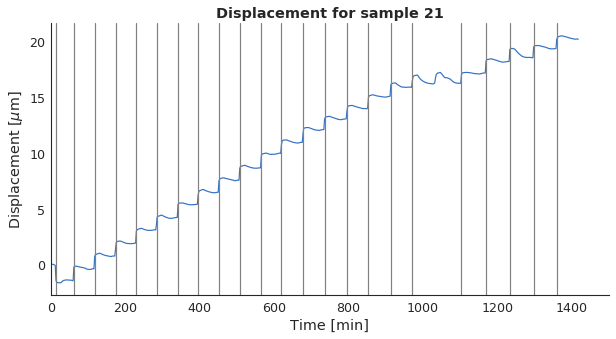

In [28]:
### SAMPLE 21 - DISPLACEMENT ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 21

# Define the minimum
jump_min = 5e-1

plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1')

for jumps in sim_1_jumps[sample_number]:
    
    plt.axvline(jumps, color = 'grey')

plt.title('Displacement for sample ' + str(sample_number), fontweight='bold')
#plt.axhline(5e-1, color = 'grey')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
sns.despine()

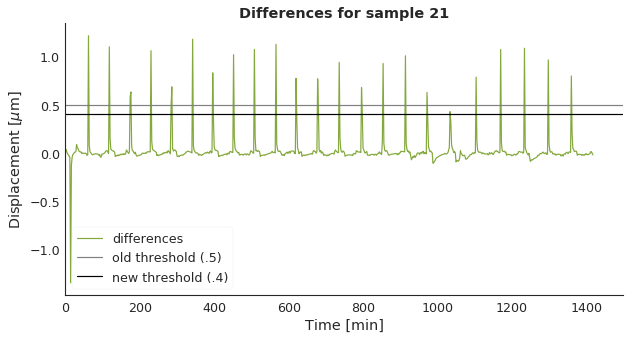

In [29]:
### SAMPLE 21 - DIFFERENCES ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 21

# Define minimum
jump_min = 5e-1
jump_min_new = 4e-1

#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1', label = 'differences')

plt.title('Differences for sample ' + str(sample_number), fontweight='bold')
plt.axhline(jump_min, color = 'grey', label = 'old threshold (.5)')
plt.axhline(jump_min_new, color = 'black', label = 'new threshold (.4)')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.legend()
sns.despine()

The problem with this sample is that one of the jumps is not being detected, as seen in the displacement plot. From the differences plot, we realize that there is a peak just below the .5 threshold, in the time interval where there seems to be a jump that is not detected. Thus, we only need to adjust that threshold, to, for instance, 0.4. Let's just note it for now and apply the changes after looking at the other samples, though, as we may need to, for instance, only apply it to this sample or lower it even more.

<span style="background-color: #a7dee5"><b> CONCLUSIONS: The jump threshold should be lowered (to less than 4e-1). </b></span>

<br>

### Displacement with well-defined jumps, followed by little or no displacement with less well-defined jumps - samples 09 and 13
Samples <b>9</b> and <b>13</b> share a similar issue: the cell migrates, and jumps are visible, but it reaches a stall. After that, there are some "jumps", which are not being quantified. The question here is whether they do qualify as jumps or not. In other to answer it, looking into the VTPs is necessary.

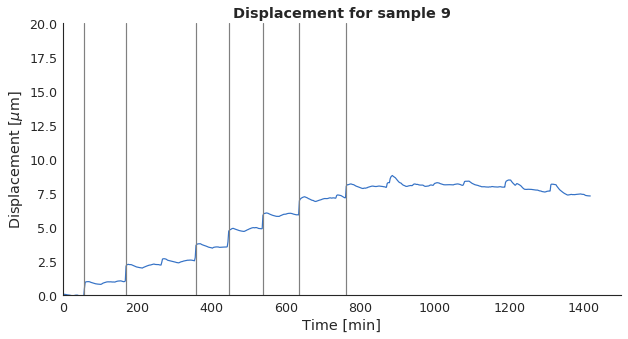

In [26]:
### SAMPLE 9 - DISPLACEMENT ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 9

plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1')

for jumps in sim_1_jumps[sample_number]:
    
    plt.axvline(jumps, color = 'grey')

plt.title('Displacement for sample ' + str(sample_number), fontweight='bold')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.ylim(0,20)
plt.xlim(0, 1500)
sns.despine()

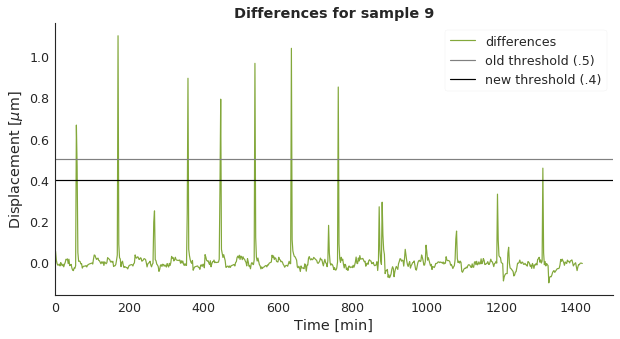

In [27]:
### SAMPLE 9 - DIFFERENCES ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 9

# Define minimum
jump_min = 5e-1
jump_min_new = 4e-1

#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1', label = 'differences')

plt.title('Differences for sample ' + str(sample_number), fontweight='bold')
plt.axhline(jump_min, color = 'grey', label = 'old threshold (.5)')
plt.axhline(jump_min_new, color = 'black', label = 'new threshold (.4)')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.legend()
sns.despine()

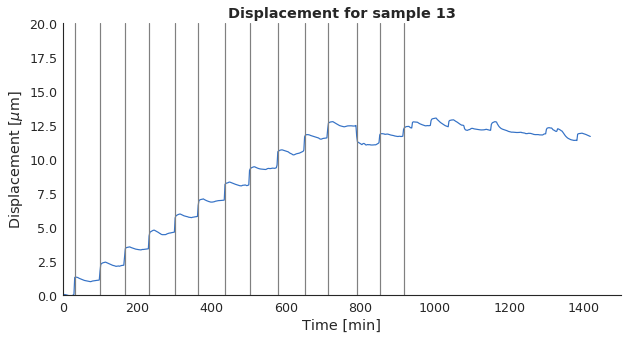

In [24]:
### SAMPLE 13 - DISPLACEMENT ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 13

plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1')

for jumps in sim_1_jumps[sample_number]:
    
    plt.axvline(jumps, color = 'grey')

plt.title('Displacement for sample ' + str(sample_number), fontweight='bold')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.ylim(0,20)
plt.xlim(0, 1500)
sns.despine()

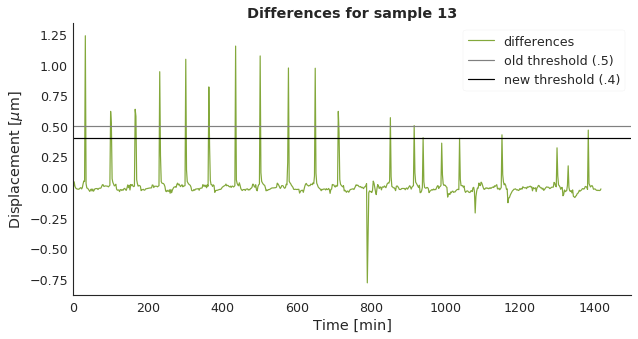

In [23]:
### SAMPLE 13 - DIFFERENCES ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 13

# Define minimum
jump_min = 5e-1
jump_min_new = 4e-1

#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1', label = 'differences')

plt.title('Differences for sample ' + str(sample_number), fontweight='bold')
plt.axhline(jump_min, color = 'grey', label = 'old threshold (.5)')
plt.axhline(jump_min_new, color = 'black', label = 'new threshold (.4)')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.legend()
sns.despine()

Samples 9 and 13 are a bit different: sample 13 has a series of jumps, all with approximately the same height, until it stalls and does not migrate more, in spite of still contracting. Whereas, sample 9 has a small jump at around 300 min, which is nor quantified as a jump. Looking into the VTPs, what we notice is that, for that small jump, <b>only the lower half of the cell contracts</b>. Thus, it makes sense that it is not seen as a jump, at least not as one of the jumps we have been seeing until now.

Regarding the jumps from 800 min onwards, the VTPs confirm what we can deduce from the plots: there is contraction (usually not as much as for the previous jumps, but still, there is some contraction), but the cell does not move. In fact, using the <b>4e-1</b> threshold, some of these displacements would be considered as jumps. 

<span style="background-color: #a7dee5"><b>CONCLUSIONS:<b> There are some different options:</span>
- <span style="background-color: #a7dee5"><b>Quantify all types of contraction as jumps</b></span> - Not literally "all types of contraction", a minimum would still be required, but it would be relatively low (2e-5, for instance);
- <span style="background-color: #a7dee5"><b>Disregard all types of contraction below a threshold of ~4e-1</b></span> - The goal of this would be to only account for the major jumps. However, looking into sample 21, although there was no displacement (so it is actually similar to the jumps from sample 9 and 13), it makes sense to call it a jump. To make this even harder, there are some jumps from samples 9 and 13 that surpass the 4e-1 limit. So, it would be hard to come up with a solution that would both include the jump from sample 21 and disregard the ones from samples 9 and 13.
- <span style="background-color: #a7dee5"><b>Define different jump "levels"</b></span> - With this solution, as in the first one, "all" types of contraction would be quantified, but more information on the jumps would be kept, namely if it was a <b>"full" </b>or<b> "partial"</b> contraction (full being above the 4e-1 limit and partial being above 2e-1, for instance), and whether it led to migration or not (meaning that we would look into some time after the jump and understand if the displacement had remained the same or even dropped).
    
<b>To me, it makes the most sense to define different "levels"</b>. It may be more challenging to get those metrics for the jumps (particularly if the jump results in migration, but it is feasible).

<br>

### Almost no displacement, but some contraction - samples 14, 18 and 22
Samples <b>14, 18</b> and <b>22</b> are somewhat similar to the what happens by the end of the simulations in the last cases: little to no migration, but with partial or even full contraction of the back. Once again, looking at the VTPs is relevant.

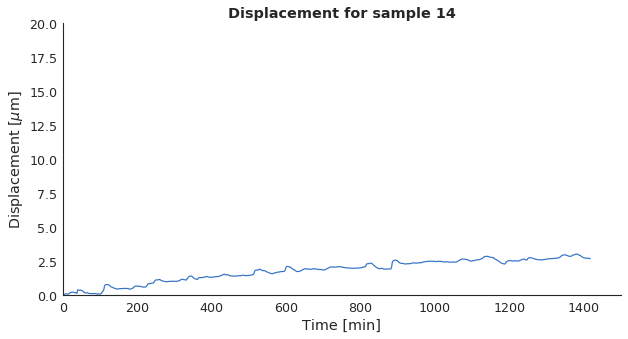

In [21]:
### SAMPLE 14 - DISPLACEMENT ###
fig = plt.figure(figsize = (10,5))
sns.set_style("white")

# Define number of the sample that should be plotted
sample_number = 14

plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1')

for jumps in sim_1_jumps[sample_number]:
    
    plt.axvline(jumps, color = 'grey')

plt.title('Displacement for sample ' + str(sample_number), fontweight='bold')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.ylim(0, 20)
plt.xlim(0, 1500)
sns.despine()

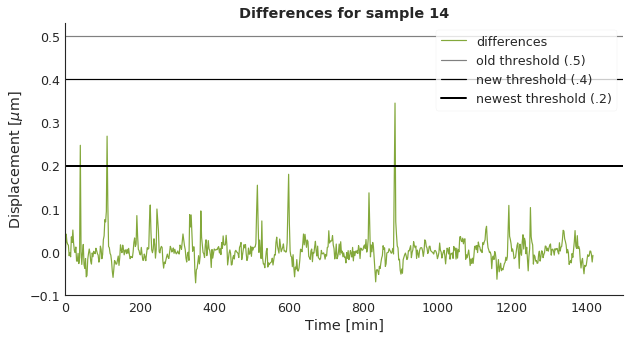

In [37]:
### SAMPLE 14 - DIFFERENCES ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 14

# Define minimum
jump_min = 5e-1
jump_min_new = 4e-1
jump_min_ex = 2e-1

#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1', label = 'differences')

plt.title('Differences for sample ' + str(sample_number), fontweight='bold')
plt.axhline(jump_min, color = 'grey', label = 'old threshold (.5)')
plt.axhline(jump_min_new, color = 'black', label = 'new threshold (.4)')
plt.axhline(jump_min_ex, color = 'black', linewidth=2.0, label = 'newest threshold (.2)')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.legend(loc = 'upper right')
plt.xlim(0, 1500)
sns.despine()

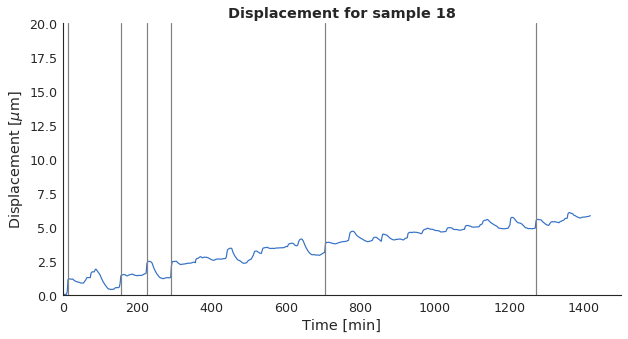

In [33]:
### SAMPLE 18 - DISPLACEMENT ###
fig = plt.figure(figsize = (10,5))
sns.set_style("white")

# Define number of the sample that should be plotted
sample_number = 18

plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1')

for jumps in sim_1_jumps[sample_number]:
    
    plt.axvline(jumps, color = 'grey')

plt.title('Displacement for sample ' + str(sample_number), fontweight='bold')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.ylim(0, 20)
plt.xlim(0, 1500)
sns.despine()

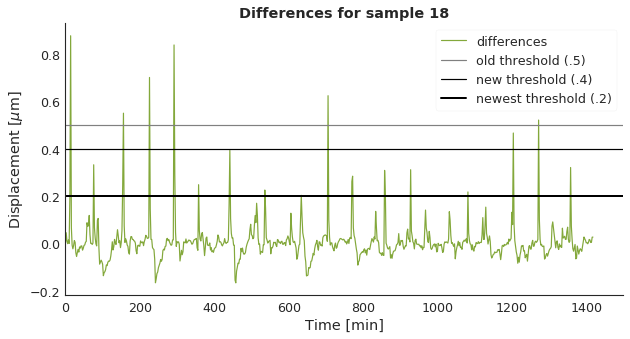

In [38]:
### SAMPLE 14 - DIFFERENCES ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 18

# Define minimum
jump_min = 5e-1
jump_min_new = 4e-1
jump_min_ex = 2e-1

#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1', label = 'differences')

plt.title('Differences for sample ' + str(sample_number), fontweight='bold')
plt.axhline(jump_min, color = 'grey', label = 'old threshold (.5)')
plt.axhline(jump_min_new, color = 'black', label = 'new threshold (.4)')
plt.axhline(jump_min_ex, color = 'black', linewidth=2.0, label = 'newest threshold (.2)')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.legend(loc = 'upper right')
plt.xlim(0, 1500)
sns.despine()

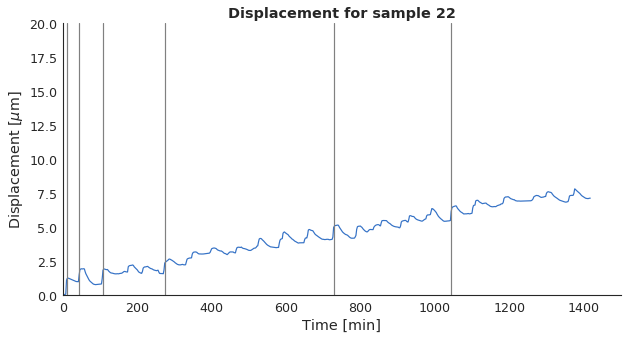

In [35]:
### SAMPLE 22 - DISPLACEMENT ###
fig = plt.figure(figsize = (10,5))
sns.set_style("white")

# Define number of the sample that should be plotted
sample_number = 22

plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1')

for jumps in sim_1_jumps[sample_number]:
    
    plt.axvline(jumps, color = 'grey')

plt.title('Displacement for sample ' + str(sample_number), fontweight='bold')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.ylim(0, 20)
plt.xlim(0, 1500)
sns.despine()

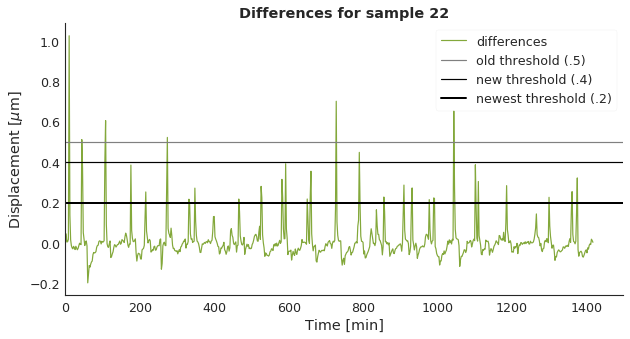

In [39]:
### SAMPLE 22 - DIFFERENCES ###
fig = plt.figure(figsize = (10,5))

# Define number of the sample that should be plotted
sample_number = 22

# Define minimum
jump_min = 5e-1
jump_min_new = 4e-1
jump_min_ex = 2e-1

#plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number])
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == sample_number], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == sample_number], color = 'C1', label = 'differences')

plt.title('Differences for sample ' + str(sample_number), fontweight='bold')
plt.axhline(jump_min, color = 'grey', label = 'old threshold (.5)')
plt.axhline(jump_min_new, color = 'black', label = 'new threshold (.4)')
plt.axhline(jump_min_ex, color = 'black', linewidth=2.0, label = 'newest threshold (.2)')
plt.xlabel('Time [min]')
plt.ylabel('Displacement [$\mu$m]')
plt.legend(loc = 'upper right')
plt.xlim(0, 1500)
sns.despine()

As before, there are "full" jumps, although there is no migration. Nevertheless, there are also many changes in displacement that, from the observation of the displacement plot, may be interpreted as jumps, but do not reach the 5e-1 threshold. In fact, most of them do not reach the 4e-1 threshold, either. Moreover, there are some fluctuations that seem relevant but do not reach the newest threshold of 2e-1. Yet, are they significant? If we keep lowering the threshold maybe there will always be a peak just below that value, that should also be considered, and we may get too low for it to be significant, at all. The VTPs could be a good source of information for this threshold, by evaluating which jumps were too small to be noticed, but there is not a clear answer.

Just to be sure, <b>let's plot the jumps for these last three samples for a threshold of 4e-1 and for 2e-1</b> (and 5e-1, for comparison).

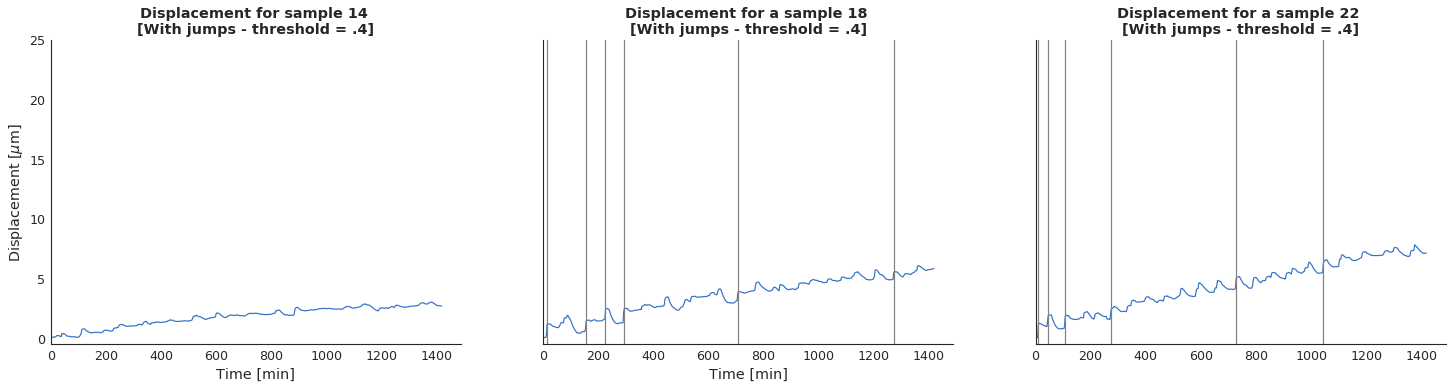

In [47]:
### DISPLACEMENT DIFFERENCES EXAMPLE PLOT ###
# Figure definition
fig, ax = plt.subplots(1, 3, sharey = True, sharex = True)
fig.set_figwidth(25)

# Plot displacement differences
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 14], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 14])
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 18], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 18])
ax[2].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 22])

for jump in sim_1_jumps[14]:
    
    ax[0].axvline(jump, color = 'gray')
    
for jump in sim_1_jumps[18]:
    
    ax[1].axvline(jump, color = 'gray')
    
for jump in sim_1_jumps[22]:
    
    ax[2].axvline(jump, color = 'gray')

# Figure aesthetics
ax[0].set_ylim(-.5, 25)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, None)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
ax[0].set_title('Displacement for sample 14 \n[With jumps - threshold = .4]', weight = 'bold')
ax[1].set_title('Displacement for a sample 18 \n[With jumps - threshold = .4]', weight = 'bold')
ax[2].set_title('Displacement for a sample 22 \n[With jumps - threshold = .4]', weight = 'bold')
sns.despine(fig)

In [48]:
### GET ON INFORMATION ON JUMPS ###
# Set the minimum difference in displacement to be considered a jump
jump_min = 4e-1

# Set variable for sample number
count = 0

# Define if you want to print the information on jumps or just store it in a DataFrame (if printed, the results will still be stored)
printInfo = True

# Define dictionary to store the time values for the jumps of each sample
sim_1_jumps = {}

# Define DataFrame to store general information on the jumps for each sample
jumps_info = pd.DataFrame(np.nan, index = range(0, 24*5), columns = ['sim_num', 'samp_num', 'jump_num', 'first_jump', 
                                                                     'jump_time_mean', 'jump_time_std', 'dtch_jump_num'])

# Going through the samples to store (and print) information on jumps
for n in range(0, 4):
    
    for m in range(0,6):
        
        # Get jumps for each sample
        jumps = data['time'][data['sim_num'] == 1][data['samp_num'] == count][abs(data['diff_disp']) > jump_min]
        
        # Remove duplicates that are considered as peaks (keep the first value) - some "peaks" consist of two small peaks close to each other, but
        # they should not be seen as two separate peaks, so the second value is disconsidered
        for j in range(1, np.size(jumps)):
            
            # Check if value is too close to the previous one 
            if jumps.iloc[j - 1] > jumps.iloc[j] - 5:
                
                # Set it as 0 to be removed
                jumps.iloc[j] = np.nan
            
        # Remove the NaN defined before (second peak values)
        jumps = jumps.dropna()
        
        # Store the jump information in the dictionary, with the sample number as key
        sim_1_jumps[count] = jumps
        
        # Print information
        if printInfo == True:
        
            print('Sample ' + str(count))
            print('Number of jumps: ' + str(np.size(jumps)))

            if np.size(jumps) != 0:

                print('Mean time between jumps: ' + str(int(np.mean(np.diff(jumps)))))
                print('Minimum interval time: ' + str(np.min(np.diff(jumps))))
                
                # In order to confirm that there are no jumps too close too each other, print a warning when difference is less than 10
                if np.min(np.diff(jumps)) < 10:

                    print('WARNING - CHECK JUMPS')

                print('First jump occurs at: ' + str(jumps.iloc[0]))

            print('')
        
        # Store information
        jumps_info['sim_num'][count] = 1 
        jumps_info['samp_num'][count] = count
        jumps_info['jump_num'][count] = np.size(jumps) 
        if np.size(jumps) == 0:
            
            jumps_info['first_jump'][count] = np.nan
            jumps_info['jump_time_mean'][count] = np.nan
            jumps_info['jump_time_std'][count] = np.nan
        else:
            
            jumps_info['first_jump'][count] = jumps.iloc[0]
            jumps_info['jump_time_mean'][count] = np.mean(jumps)
            jumps_info['jump_time_std'][count] = np.std(jumps)
            
        # Increment sample counter
        count += 1

Sample 0
Number of jumps: 0

Sample 1
Number of jumps: 0

Sample 2
Number of jumps: 0

Sample 3
Number of jumps: 0

Sample 4
Number of jumps: 0

Sample 5
Number of jumps: 0

Sample 6
Number of jumps: 0

Sample 7
Number of jumps: 0

Sample 8
Number of jumps: 7
Mean time between jumps: 167
Minimum interval time: 120.0
First jump occurs at: 376.0

Sample 9
Number of jumps: 8
Mean time between jumps: 179
Minimum interval time: 88.0
First jump occurs at: 58.0

Sample 10
Number of jumps: 0

Sample 11
Number of jumps: 0

Sample 12
Number of jumps: 15
Mean time between jumps: 85
Minimum interval time: 66.0
First jump occurs at: 36.0

Sample 13
Number of jumps: 17
Mean time between jumps: 84
Minimum interval time: 24.0
First jump occurs at: 32.0

Sample 14
Number of jumps: 0

Sample 15
Number of jumps: 0

Sample 16
Number of jumps: 20
Mean time between jumps: 70
Minimum interval time: 56.0
First jump occurs at: 18.0

Sample 17
Number of jumps: 24
Mean time between jumps: 60
Minimum interval tim

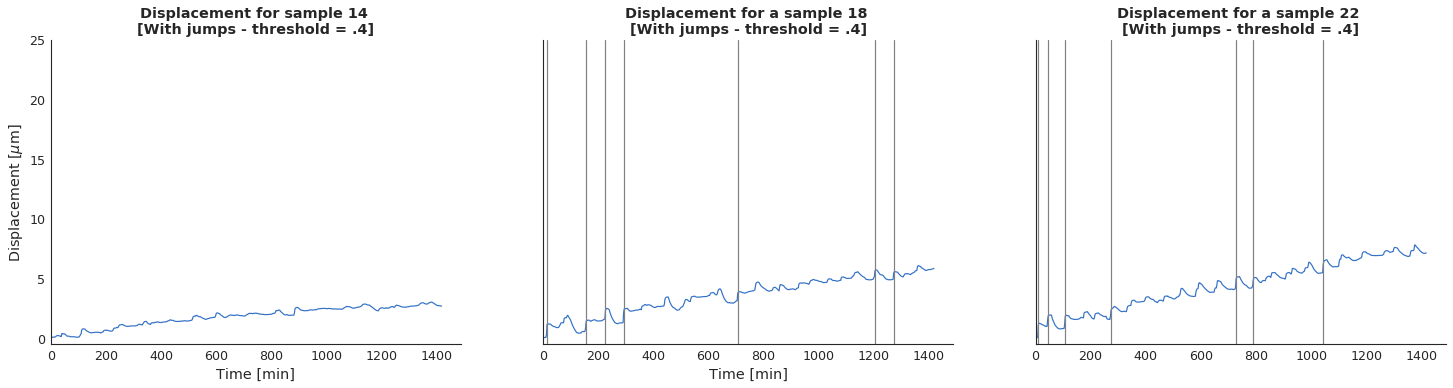

In [49]:
### DISPLACEMENT DIFFERENCES EXAMPLE PLOT ###
# Figure definition
fig, ax = plt.subplots(1, 3, sharey = True, sharex = True)
fig.set_figwidth(25)

# Plot displacement differences
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 14], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 14])
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 18], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 18])
ax[2].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 22])

for jump in sim_1_jumps[14]:
    
    ax[0].axvline(jump, color = 'gray')
    
for jump in sim_1_jumps[18]:
    
    ax[1].axvline(jump, color = 'gray')
    
for jump in sim_1_jumps[22]:
    
    ax[2].axvline(jump, color = 'gray')

# Figure aesthetics
ax[0].set_ylim(-.5, 25)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, None)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
ax[0].set_title('Displacement for sample 14 \n[With jumps - threshold = .4]', weight = 'bold')
ax[1].set_title('Displacement for a sample 18 \n[With jumps - threshold = .4]', weight = 'bold')
ax[2].set_title('Displacement for a sample 22 \n[With jumps - threshold = .4]', weight = 'bold')
sns.despine(fig)

In [98]:
### GET ON INFORMATION ON JUMPS ###
# Set the minimum difference in displacement to be considered a jump
jump_min = 2e-1

# Set variable for sample number
count = 0

# Define if you want to print the information on jumps or just store it in a DataFrame (if printed, the results will still be stored)
printInfo = True

# Define dictionary to store the time values for the jumps of each sample
sim_1_jumps = {}

# Define DataFrame to store general information on the jumps for each sample
jumps_info = pd.DataFrame(np.nan, index = range(0, 24*5), columns = ['sim_num', 'samp_num', 'jump_num', 'first_jump', 
                                                                     'jump_time_mean', 'jump_time_std', 'dtch_jump_num'])

# Going through the samples to store (and print) information on jumps
for n in range(0, 4):
    
    for m in range(0,6):
        
        # Get jumps for each sample
        jumps = data['time'][data['sim_num'] == 1][data['samp_num'] == count][abs(data['diff_disp']) > jump_min]
        
        # Remove duplicates that are considered as peaks (keep the first value) - some "peaks" consist of two small peaks close to each other, but
        # they should not be seen as two separate peaks, so the second value is disconsidered
        for j in range(1, np.size(jumps)):
            
            # Check if value is too close to the previous one 
            if jumps.iloc[j - 1] > jumps.iloc[j] - 5:
                
                # Set it as 0 to be removed
                jumps.iloc[j] = np.nan
            
        # Remove the NaN defined before (second peak values)
        jumps = jumps.dropna()
        
        # Store the jump information in the dictionary, with the sample number as key
        sim_1_jumps[count] = jumps
        
        # Print information
        if printInfo == True:
        
            print('Sample ' + str(count))
            print('Number of jumps: ' + str(np.size(jumps)))

            if np.size(jumps) > 1:

                print('Mean time between jumps: ' + str(np.mean(np.diff(jumps))))
                print('Minimum interval time: ' + str(np.min(np.diff(jumps))))
                
                # In order to confirm that there are no jumps too close too each other, print a warning when difference is less than 10
                if np.min(np.diff(jumps)) < 10:

                    print('WARNING - CHECK JUMPS')

                print('First jump occurs at: ' + str(jumps.iloc[0]))

            print('')
        
        # Store information
        jumps_info['sim_num'][count] = 1 
        jumps_info['samp_num'][count] = count
        jumps_info['jump_num'][count] = np.size(jumps) 
        if np.size(jumps) == 0:
            
            jumps_info['first_jump'][count] = np.nan
            jumps_info['jump_time_mean'][count] = np.nan
            jumps_info['jump_time_std'][count] = np.nan
        else:
            
            jumps_info['first_jump'][count] = jumps.iloc[0]
            jumps_info['jump_time_mean'][count] = np.mean(jumps)
            jumps_info['jump_time_std'][count] = np.std(jumps)
            
        # Increment sample counter
        count += 1

Sample 0
Number of jumps: 0

Sample 1
Number of jumps: 0

Sample 2
Number of jumps: 0

Sample 3
Number of jumps: 0

Sample 4
Number of jumps: 0

Sample 5
Number of jumps: 0

Sample 6
Number of jumps: 0

Sample 7
Number of jumps: 0

Sample 8
Number of jumps: 7
Mean time between jumps: 167.0
Minimum interval time: 120.0
First jump occurs at: 376.0

Sample 9
Number of jumps: 12
Mean time between jumps: 114.0
Minimum interval time: 8.0
WARNING - CHECK JUMPS
First jump occurs at: 58.0

Sample 10
Number of jumps: 0

Sample 11
Number of jumps: 0

Sample 12
Number of jumps: 15
Mean time between jumps: 85.71428571428571
Minimum interval time: 66.0
First jump occurs at: 36.0

Sample 13
Number of jumps: 21
Mean time between jumps: 67.6
Minimum interval time: 24.0
First jump occurs at: 32.0

Sample 14
Number of jumps: 3
Mean time between jumps: 423.0
Minimum interval time: 72.0
First jump occurs at: 40.0

Sample 15
Number of jumps: 0

Sample 16
Number of jumps: 20
Mean time between jumps: 70.42105

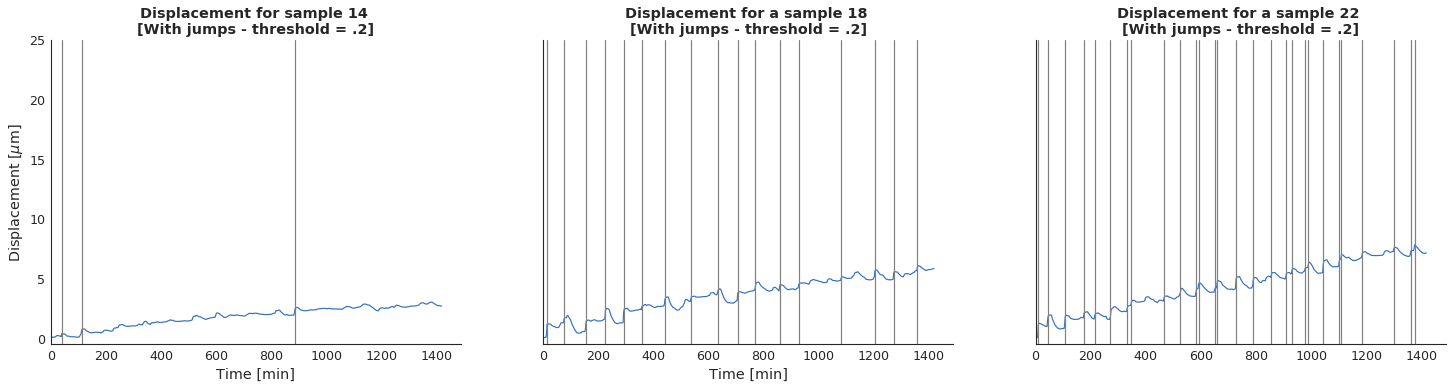

In [103]:
### DISPLACEMENT DIFFERENCES EXAMPLE PLOT ###
# Figure definition
fig, ax = plt.subplots(1, 3, sharey = True, sharex = True)
fig.set_figwidth(25)

# Plot displacement differences
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 14], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 14])
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 18], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 18])
ax[2].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 22])

for jump in sim_1_jumps[14]:
    
    ax[0].axvline(jump, color = 'gray')
    
for jump in sim_1_jumps[18]:
    
    ax[1].axvline(jump, color = 'gray')
    
for jump in sim_1_jumps[22]:
    
    ax[2].axvline(jump, color = 'gray')

# Figure aesthetics
ax[0].set_ylim(-.5, 25)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, None)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
ax[0].set_title('Displacement for sample 14 \n[With jumps - threshold = .2]', weight = 'bold')
ax[1].set_title('Displacement for a sample 18 \n[With jumps - threshold = .2]', weight = 'bold')
ax[2].set_title('Displacement for a sample 22 \n[With jumps - threshold = .2]', weight = 'bold')
sns.despine(fig)

Concluding, lowering the threshold to 4e-1 does not affect these samples much. However, there are many changes in displacement that would start being identified by lowering the threshold to 2e-1. For sample 14 it could go even lower, in fact. I mean, looking into the displacement and differences plots (below), we do see that it is different from the samples with no jumps at all, and maybe it is relevant to show that difference in behavior.

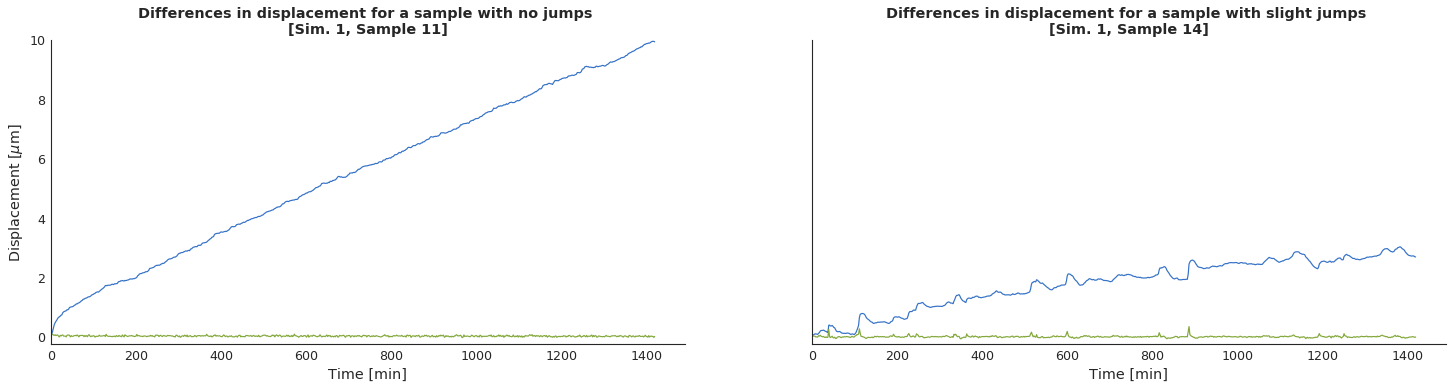

In [62]:
### DISPLACEMENT DIFFERENCES EXAMPLE PLOT ###
# Figure definition
fig, ax = plt.subplots(1, 2, sharey = True, sharex = True)
fig.set_figwidth(25)

ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 7], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 7], color = 'C0')
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 14], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 14], color = 'C0')

# Plot displacement differences
ax[0].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 11], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == 11], color = 'C1')
ax[1].plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 14], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == 14], color = 'C1')

# Figure aesthetics
ax[0].set_ylim(-.25, 10)
ax[0].set_ylabel('Displacement [$\mu$m]')
ax[0].set_xlim(0, None)
ax[0].set_xlabel('Time [min]')
ax[1].set_xlabel('Time [min]')
ax[0].set_title('Differences in displacement for a sample with no jumps \n[Sim. 1, Sample 11]', weight = 'bold')
ax[1].set_title('Differences in displacement for a sample with slight jumps \n[Sim. 1, Sample 14]', weight = 'bold')
sns.despine(fig)

So, maybe, it would be better to characterize this as a "state" or "behavior", without "overquantifying" it. In other words, quantifying exactly how many jumps there are would not be important. We could get some metric to generally quantify it, but maybe leave the quantification for the "full" jumps, and briefly characterize the "partial" jumps. For instance, it could be said that sample 14 has less, not well-defined jumps, whereas sample 22 has many, more frequent, partial jumps, that can even qualify as full jumps, in some cases.

<br>

<span style="background-color: #a7dee5"><b>CONCLUSIONS:<b></span>
    
<span style="background-color: #a7dee5"><b>4e-1 seems like a good value for "full jumps".<b></span>
    
<span style="background-color: #a7dee5"><b>2e-1 seems works well to define "partial" jumps, but slight contractions may not be identified.<b></span> Maybe <span style="background-color: #a7dee5"><b>looking at the shape of the signal as a whole<b></span> would be better, in this cases, to distinguish it from the sample where there is no contraction.
    
<span style="background-color: #a7dee5"><b>When 2e-1 is chosen, some "false jumps" (usually when there are two jumps close in time) are quantified.<b></span> This was expected and accounted for, and it was defined that jumps should have a 10 min time interval, but maybe this number has to be reconsidered.
    
<br>

Let's briefly analyze the other 4 simulations to confirm these ideas (using 4e-1 as the threshold).

<br>

## <b>Jump detection - optimizing for all simulations</b>

<br>

### Fixing the "false jumps" problem
The first thing we should do (just to get it out of the way) is to fix the code so that jumps that are too close together are not quantified as two jumps, but as one. To do so, we need to reevaluate the minimum time interval for a jump to be considered as an individual jump (previously set as <b>10 min</b>. Well, from the previous results, we conclude that, for the samples with more jumps, the mean time between jumps is around 60 min. Thus, let's define that <b>any jump under 30 min from the previous one should not be considered as a jump.</b>The displacement plot below further confirms this value.

<br>

#### Option 1 - Iterating the previous solution until reaching a minimum of 30 min
So, the strategy for detecting the peaks was quite simple to understand. A threshold was set and, every time the differences curve crossed that threshold, the corresponding time value was stored in a array. As the signal has mostly "fast" peaks, this method worked well, since it crossed the threshold in one timestep and then it would go down in the following timestep. However, for jumps that were not as well-defined there were some other, smaller, peaks, near the main one. What I was doing was comparing each value to the previous one and, if the value was in a 10 min window, I would convert it to a NaN, which could then be easily detected and removed. However, this was not working for more than 2 sequential "small" peaks, as I was comparing the new one to a NaN.

Therefore, I started <b>iterating</b> this process until the <b>minimum difference was larger than 10</b>, assuring that all "small" peaks would be not considered. 


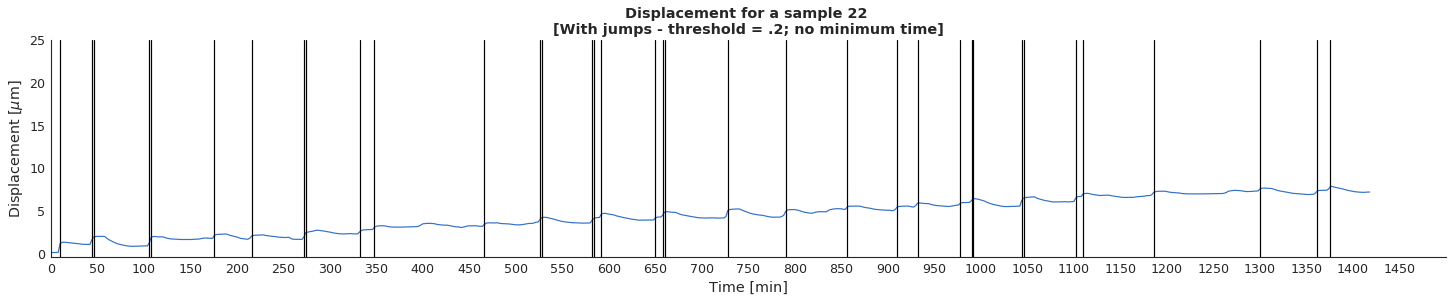

In [237]:
### FALSE JUMPS EXAMPLE PLOT - NO MINIMUM ###
# Figure definition
sns.set_style('white')
fig = plt.figure(figsize = (25,4))

jump_min = 2e-1

# Plot displacement differences
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 22])

jumps = data['time'][data['sim_num'] == 1][data['samp_num'] == 22][abs(data['diff_disp']) > jump_min]

for jump in jumps:
    
    plt.axvline(jump, color = 'black')

# Figure aesthetics
plt.ylim(-.5, 25)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.xlabel('Time [min]')
plt.title('Displacement for a sample 22 \n[With jumps - threshold = .2; no minimum time]', fontweight = 'bold')
plt.xticks(np.arange(0, 1500, 50.0))
sns.despine()

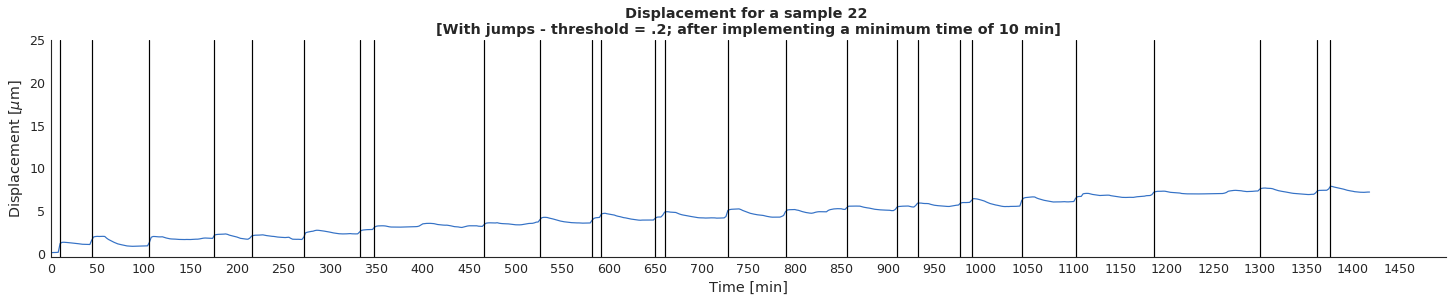

In [238]:
### FALSE JUMPS EXAMPLE PLOT - INTERVAL USED BEFORE (10 MIN) ###
#sns.set_style('whitegrid')
jumps = data['time'][data['sim_num'] == 1][data['samp_num'] == 22][abs(data['diff_disp']) > jump_min]

# This while cycle was not present before. It assures that two or more consecutive "false" jumps will still be eliminated
while(np.min(np.diff(jumps)) < 10):
    
    # Remove duplicates that are considered as peaks (keep the first value) - some "peaks" consist of two small peaks close to each other, but
    # they should not be seen as two separate peaks, so the second value is disconsidered
    for j in range(1, np.size(jumps)):

        # Check if value is too close to the previous one 
        if jumps.iloc[j - 1] > jumps.iloc[j] - 10:

            # Set it as 0 to be removed
            jumps.iloc[j] = np.nan

    jumps = jumps.dropna()            

# Figure definition
fig = plt.figure(figsize = (25,4))

# Plot displacement differences
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 22])

for jump in jumps:
    
    plt.axvline(jump, color = 'black')

# Figure aesthetics
plt.ylim(-.5, 25)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.xlabel('Time [min]')
plt.title('Displacement for a sample 22 \n[With jumps - threshold = .2; after implementing a minimum time of 10 min]', fontweight = 'bold')
plt.xticks(np.arange(0, 1500, 50.0))
sns.despine()

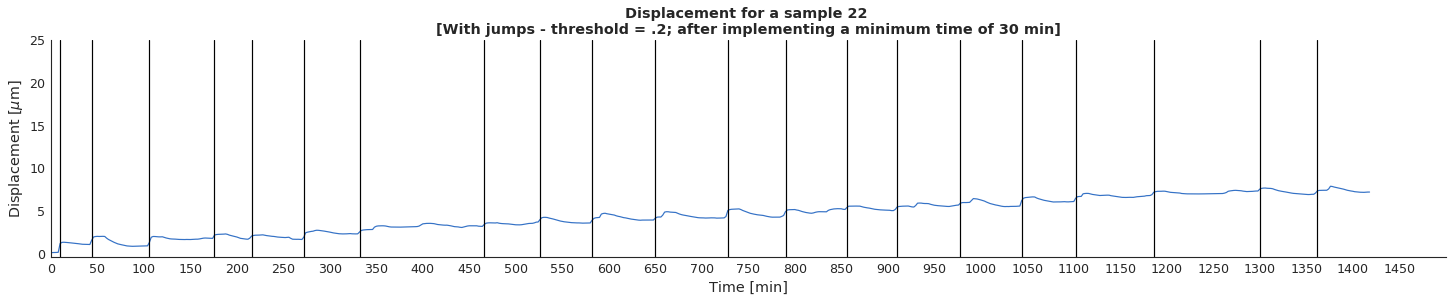

In [239]:
### FALSE JUMPS EXAMPLE PLOT - AFTER FIXING (30 MIN) ###
#sns.set_style('whitegrid')
jumps = data['time'][data['sim_num'] == 1][data['samp_num'] == 22][abs(data['diff_disp']) > jump_min]

# This while cycle was not present before. It assures that two or more consecutive "false" jumps will still be eliminated
while(np.min(np.diff(jumps)) < 30):
    
    # Remove duplicates that are considered as peaks (keep the first value) - some "peaks" consist of two small peaks close to each other, but
    # they should not be seen as two separate peaks, so the second value is disconsidered
    for j in range(1, np.size(jumps)):

        # Check if value is too close to the previous one 
        if jumps.iloc[j - 1] > jumps.iloc[j] - 30:

            # Set it as 0 to be removed
            jumps.iloc[j] = np.nan

    jumps = jumps.dropna()            

# Figure definition
fig = plt.figure(figsize = (25,4))

# Plot displacement differences
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == 22])

for jump in jumps:
    
    plt.axvline(jump, color = 'black')

# Figure aesthetics
plt.ylim(-.5, 25)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.xlabel('Time [min]')
plt.title('Displacement for a sample 22 \n[With jumps - threshold = .2; after implementing a minimum time of 30 min]', fontweight = 'bold')
plt.xticks(np.arange(0, 1500, 50.0))
sns.despine()

<span style="background-color: #a7dee5"><b>CONCLUSIONS: The 30 min interval can be used to fix this issue, using the iteration method.<b></span>

<br>

#### Option 2 - Using the find_peaks() function from the SciPy library
Although Option 1 works well, there are more efficient methods to do it, namely using the <b>find_peaks()</b> function, from the SciPy library (a Python library developed specifically for signal processing). A brief explanation of the function is provided in the SciPy website:

<blockquote><i> "This function takes a one-dimensional array and finds all local maxima by simple comparison of neighbouring values. Optionally, a subset of these peaks can be selected by specifying conditions for a peak’s properties."</i> </blockquote>

These properties include:
- **height** - a set of minimum and maximum values that describe the interval in which the peaks of interest are located in. If only one value is specified, it acts as the threshold we have been using - a minimum value that peaks should surpass to be considered as such; 
- <b> distance </b> - similar to our 10 min window; required minimal distance between peaks;

So, using this function we could define the 30 min window just by passing it as a parameter, and we could even find "full" jumps by using a height of 4e-1 and "partial" jumps by specifying an interval between 1e-1 and 4e-1. (We still need to consider if we want to differentiate jumps that lead to migration and jumps that do not).

Let's look into an example:

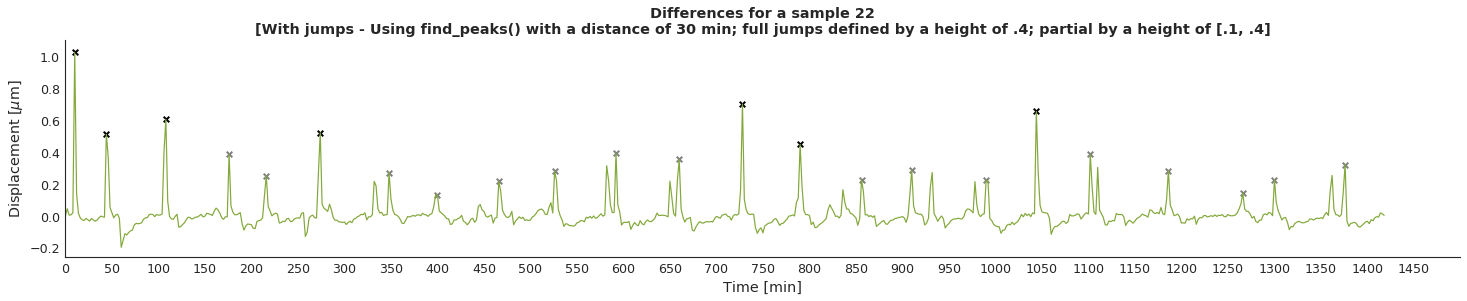

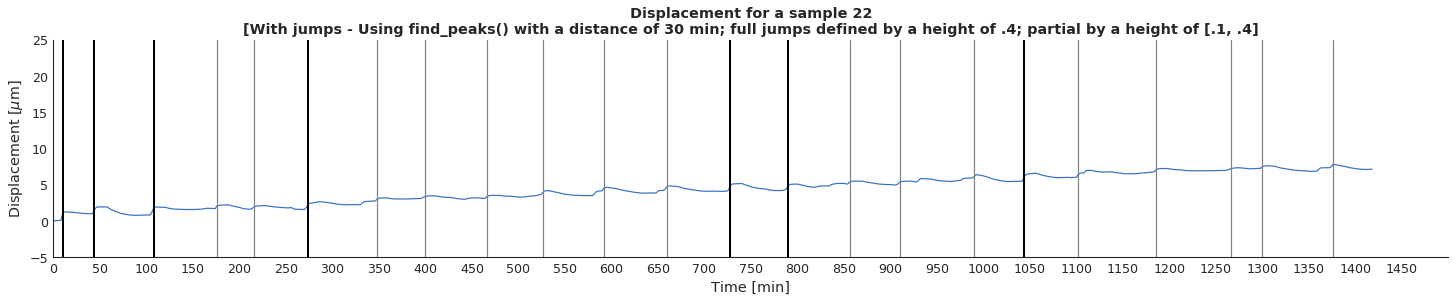

In [116]:
### FALSE JUMPS EXAMPLE PLOT - FIND_PEAKS() ###
# Import the required library
from scipy.signal import find_peaks

# Figure definition
sns.set_style('white')
fig = plt.figure(figsize = (25,4))

num = 22

# Plot displacement differences
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == num], color = 'C1', label = 'differences')

# Setting a threshold (minimum only, to prevent a small jump appearing next to a big one)
jumps, _ = find_peaks(abs(data['diff_disp'])[data['sim_num'] == 1][data['samp_num'] == num], distance = 15, height = .1)

# Differentiating small and big jumps
partial_jumps = jumps[data['diff_disp'][data['sim_num'] == 1][data['samp_num'] == num].iloc[jumps] < .4]
full_jumps = jumps[data['diff_disp'][data['sim_num'] == 1][data['samp_num'] == num].iloc[jumps] >= .4]

# Small adjusment because of the timestep
partial_jumps = partial_jumps*2
full_jumps = full_jumps*2

# Plotting the jumps
for jump in full_jumps:
    
    plt.scatter(jump, data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == num][data['time'] == jump], color = 'black', linewidth = 2, marker = 'x', label = "full jumps")
    
for jump in partial_jumps:
    
    plt.scatter(jump, data["diff_disp"][data["sim_num"] == 1][data["samp_num"] == num][data['time'] == jump], color = 'gray', linewidth = 2, marker = 'x', label = "partiall jumps")

# Figure aesthetics
#plt.ylim(-.25, None)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.xlabel('Time [min]')
plt.title('Differences for a sample ' + str(num) + '\n[With jumps - Using find_peaks() with a distance of 30 min; full jumps defined by a height of .4; partial by a height of [.1, .4]', fontweight = 'bold')
plt.xticks(np.arange(0, 1500, 50.0))
sns.despine()

fig = plt.figure(figsize = (25,4))

# Plot displacement differences
plt.plot(data["time"][data["sim_num"] == 1][data["samp_num"] == 22], data["sum_disp"][data["sim_num"] == 1][data["samp_num"] == num], color = 'C0', label = 'differences')

for jump in full_jumps:
    
    plt.axvline(jump, color = 'black', linewidth = 2, label = "full jumps")
    
for jump in partial_jumps:
    
    plt.axvline(jump, color = 'gray', label = "partiall jumps")

# Figure aesthetics
plt.ylim(-5, 25)
plt.ylabel('Displacement [$\mu$m]')
plt.xlim(0, 1500)
plt.xlabel('Time [min]')
plt.title('Displacement for a sample ' + str(num) + '\n[With jumps - Using find_peaks() with a distance of 30 min; full jumps defined by a height of .4; partial by a height of [.1, .4]', fontweight = 'bold')
plt.xticks(np.arange(0, 1500, 50.0))
sns.despine()

Considering that **full jumps are represented by black and partial by gray**, we can see that the algorithm does a good job finding the peaks and selecting the most relevant (in our iteration we were assuming that the peak that should be kept was the first one to appear, but that is not always the case, and this algorithm avoids choosing the "wrong" peak).

<br>

<span style="background-color: #a7dee5">**CONCLUSIONS: The SciPy function will be used. The thresholds will be discussed but for now will be 4e-1 and 2e-1.**</span>
    
<span style="background-color: #a7dee5">**We still need to classify the jumps in terms of resulting in migration or not.**</span>

<br>

### Checking if the code works well for the other simulations
<b>Simulations 1-5</b>

In [420]:
### Function to plot the displacement and jumps for a specified simulation ###
def plotDispAndJumps(sim_num):
    # Set the minimum difference in displacement to be considered a jump
    partial_jump_min = 2e-1
    full_jump_min = 4e-1

    # Set variable for sample number
    count = 0

    # Figure definition
    fig, ax = plt.subplots(24, 2)
    fig.set_figheight(140)
    fig.set_figwidth(30)
    sns.set_style("white")

    # Going through all samples to plot the differences, displacement and jumps
    for n in range(0, 4):

        for m in range(0,6):

            # Plot displacement and differences
            ax[count, 0].plot(data["time"][data["sim_num"] == sim_num][data["samp_num"] == count], data["sum_disp"][data["sim_num"] == sim_num][data["samp_num"] == count], label = 'displacement')
            ax[count, 0].plot(data["time"][data["sim_num"] == sim_num][data["samp_num"] == count], data["diff_disp"][data["sim_num"] == sim_num][data["samp_num"] == count], label = 'differences')
            ax[count, 1].plot(data["time"][data["sim_num"] == sim_num][data["samp_num"] == count], data["sum_disp"][data["sim_num"] == sim_num][data["samp_num"] == count])
            ax[count, 1].plot(data["time"][data["sim_num"] == sim_num][data["samp_num"] == count], data["diff_disp"][data["sim_num"] == sim_num][data["samp_num"] == count])

            # Setting a threshold (minimum only, to prevent a small jump appearing next to a big one)
            jumps, _ = find_peaks(abs(data['diff_disp'])[data['sim_num'] == sim_num][data['samp_num'] == count], distance = 15, height = partial_jump_min)

            # Differentiating small and big jumps
            partial_jumps = jumps[abs(data['diff_disp'][data['sim_num'] == sim_num][data['samp_num'] == count].iloc[jumps]) < full_jump_min]
            full_jumps = jumps[abs(data['diff_disp'][data['sim_num'] == sim_num][data['samp_num'] == count].iloc[jumps]) >= full_jump_min]

            # Small adjusment because of the timestep
            partial_jumps = partial_jumps*2
            full_jumps = full_jumps*2

            # Plot jumps as vertical lines
            for jump in partial_jumps:

                ax[count, 1].axvline(jump, color = 'gray')

             # Plot jumps as vertical lines
            for jump in full_jumps:

                ax[count, 1].axvline(jump, color = 'black', linewidth = 2)

            # Figure aesthetics
            ax[count, 0].legend(loc = "upper left")
            ax[count, 0].set_ylim(-5, 25)
            ax[count, 1].set_ylim(-5, 25)
            ax[count, 0].set_title('Displacement and differences for sample ' + str(count), weight = 'bold')
            ax[count, 1].set_title('Displacement and differences for sample ' + str(count) + ' [With jumps]', weight = 'bold')
            ax[count, 0].set_xlim(0, None)
            ax[count, 1].set_xlim(0, None)

            # Increment sample counter
            count += 1

        sns.despine(fig)

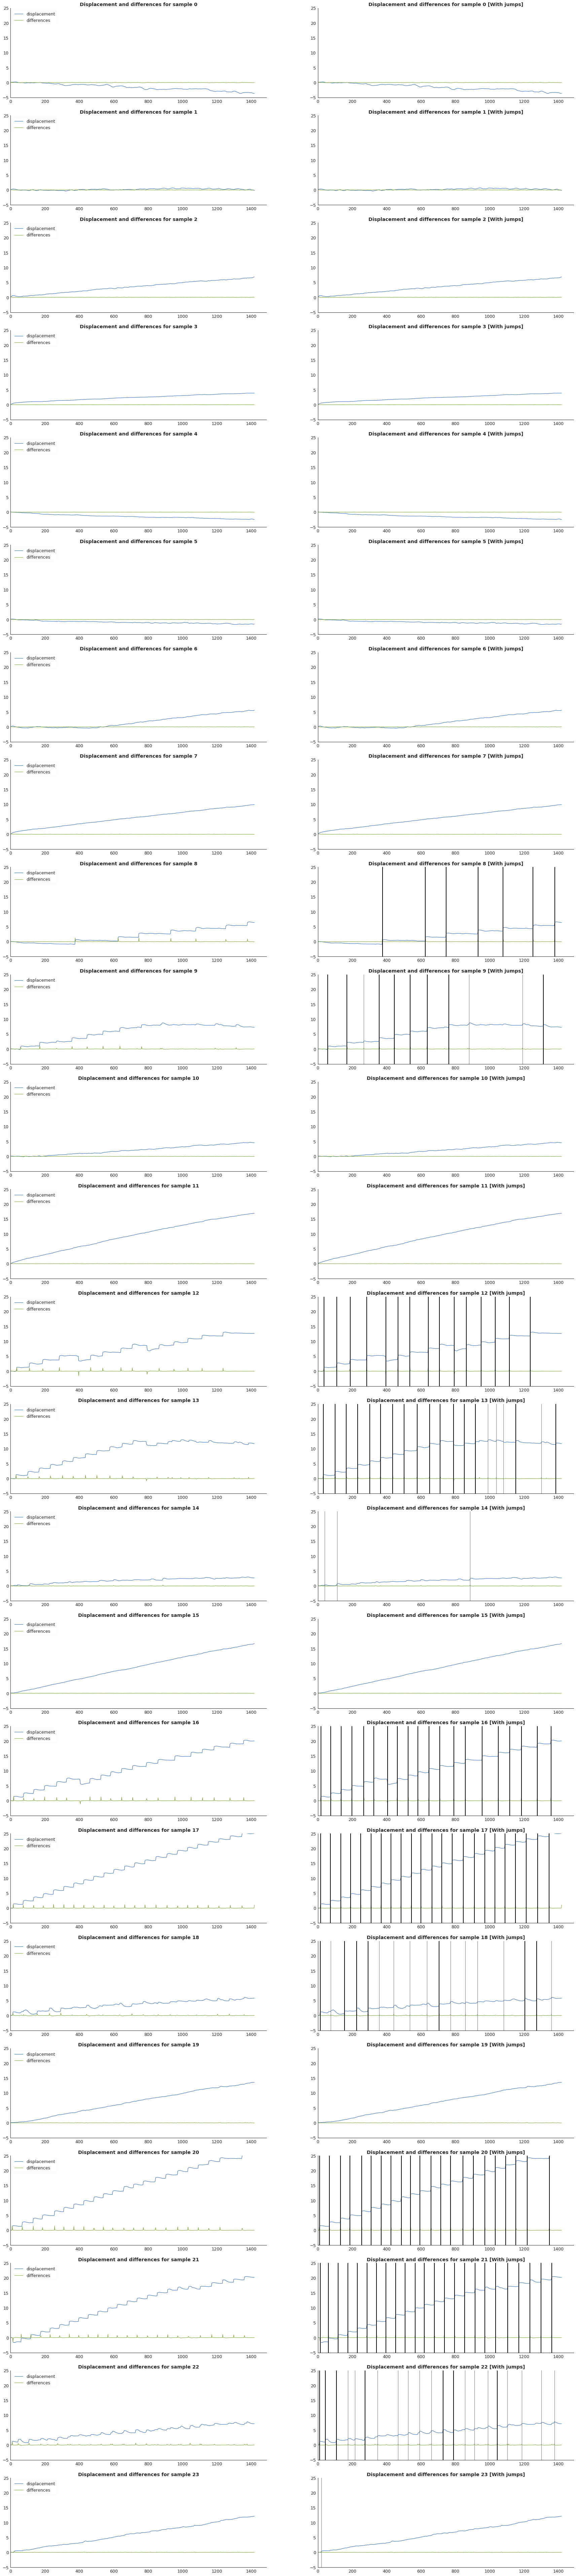

In [421]:
### PLOT JUMPS FOR ALL SAMPLES - SIM 1 (recompute for 4e-1/2e-1) ###
plotDispAndJumps(1)

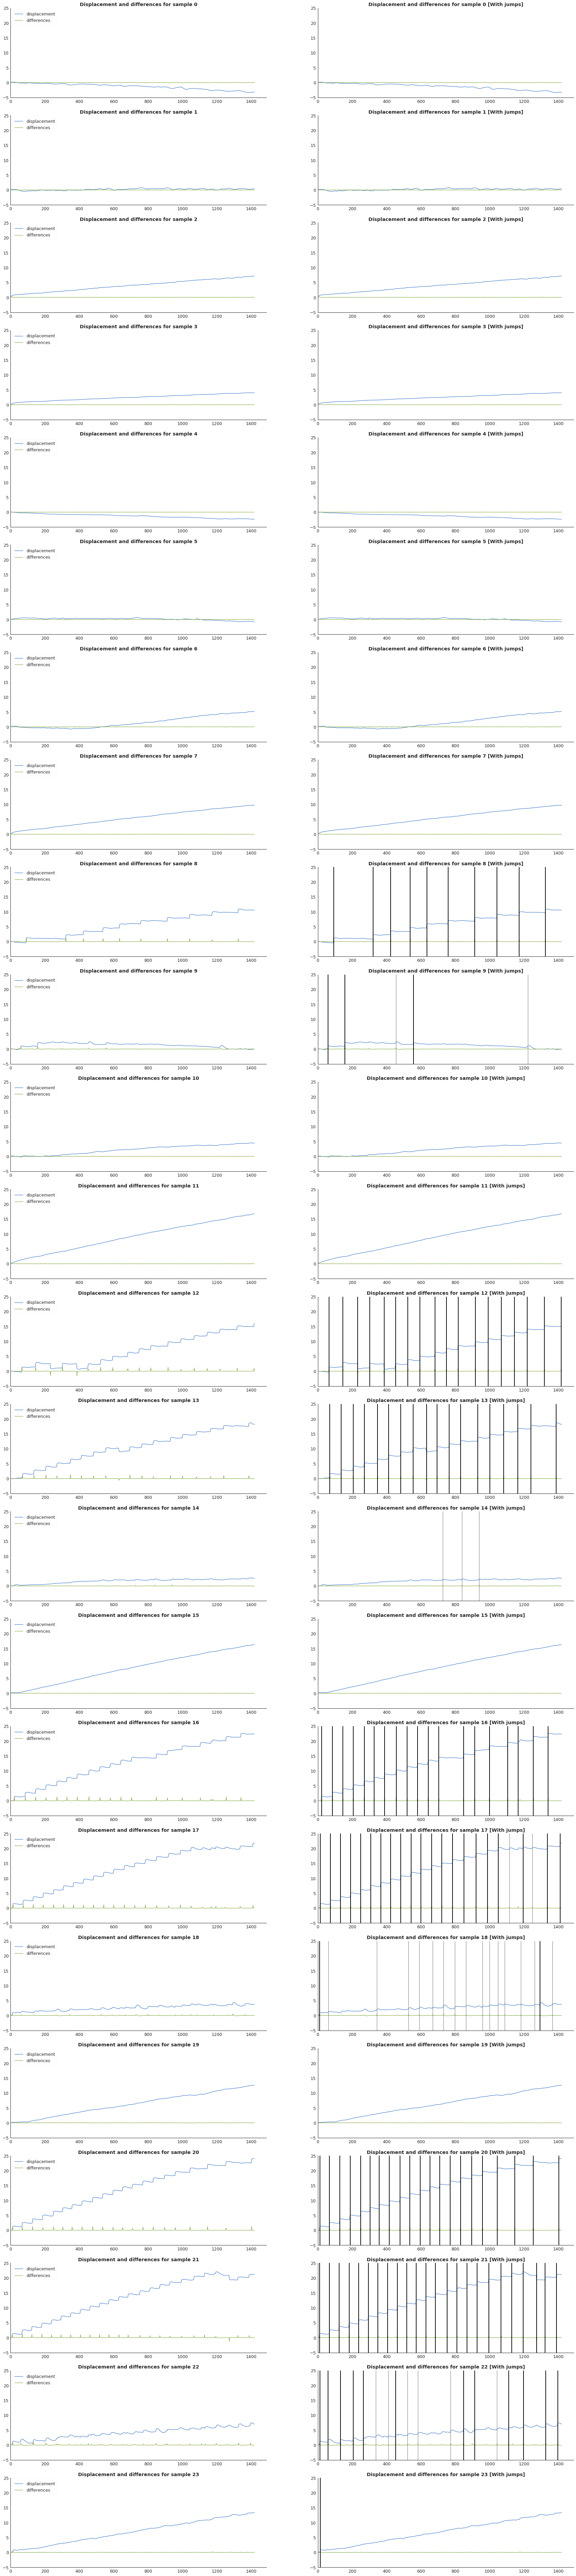

In [422]:
### PLOT JUMPS FOR ALL SAMPLES - SIM 2###
plotDispAndJumps(2)

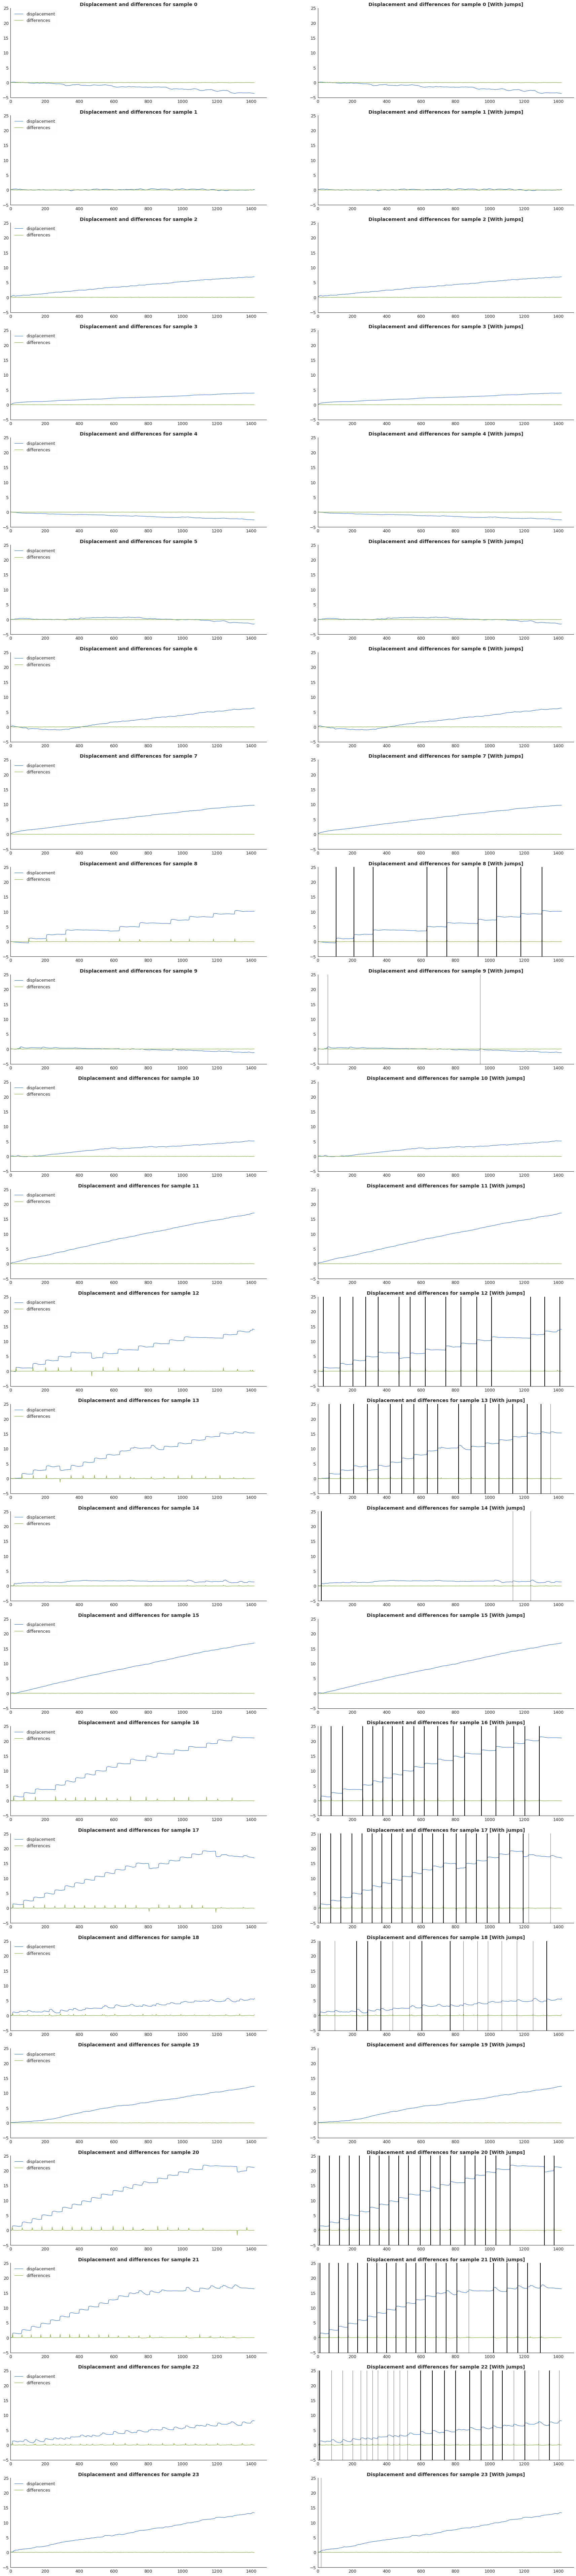

In [423]:
### PLOT JUMPS FOR ALL SAMPLES - SIM 3 ###
plotDispAndJumps(3)

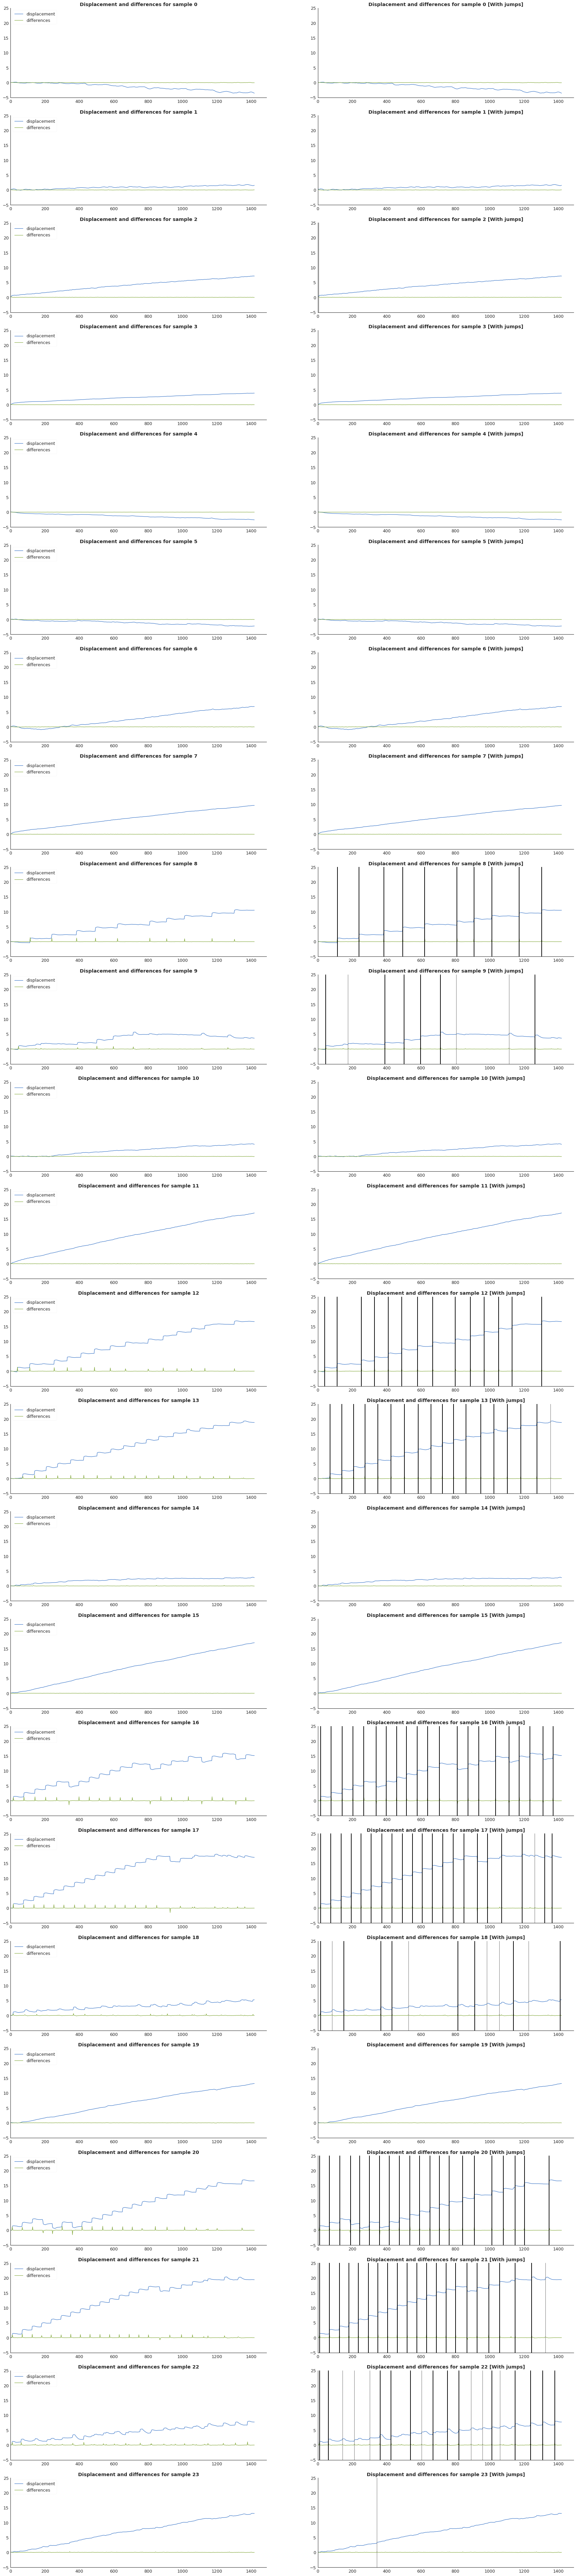

In [424]:
### PLOT JUMPS FOR ALL SAMPLES - SIM 4 ###
plotDispAndJumps(4)

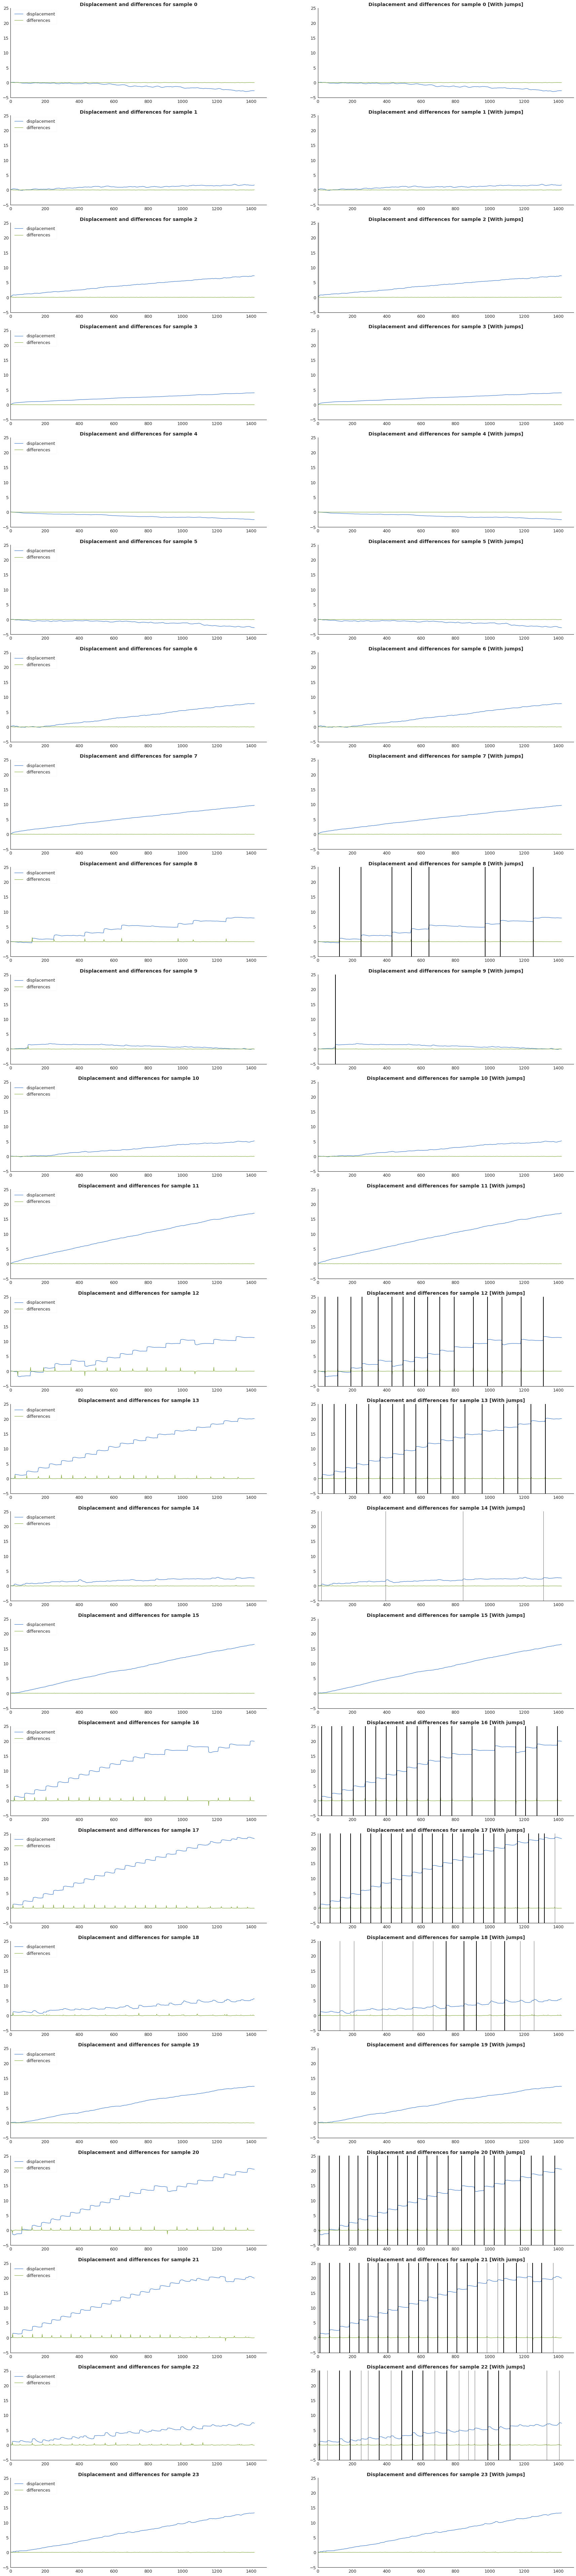

In [425]:
### PLOT JUMPS FOR ALL SAMPLES - SIM 5 ###
plotDispAndJumps(5)

In [118]:
### GET ON INFORMATION ON JUMPS - ALL ###
# Set the minimum difference in displacement to be considered a jump
partial_jump_min = 2e-1
full_jump_min = 5e-1

# Define dictionary to store the time values for the jumps of each sample (for all simulations)
sim_jumps = {}

# Define DataFrame to store general information on the jumps for each sample
jumps_info = pd.DataFrame(np.nan, index = range(0, 24*5), columns = ['sim_num', 'samp_num', 'pFA_rev', 'kECM', 'jumps_num', 'full_jump_num', 'partial_jump_num',
                                                                     'first_full_jump', 'jump_time_mean', 'jump_time_std'])

# Going through simulations
for s in range(1,6):
    
    # Set variable for sample number
    count = 0
    
    # Define dictionary to store the time values for the jumps of each sample
    sim_specific_jumps = {}
    
    # Going through the samples to store (and print) information on jumps
    for n in range(0, 4):

        for m in range(0,6):

            # Setting a threshold (minimum only, to prevent a small jump appearing next to a big one)
            jumps, _ = find_peaks(abs(data['diff_disp'])[data['sim_num'] == s][data['samp_num'] == count], distance = 15, height = partial_jump_min)

            # Differentiating small and big jumps
            partial_jumps = jumps[abs(data['diff_disp'][data['sim_num'] == s][data['samp_num'] == count].iloc[jumps]) < full_jump_min]
            full_jumps = jumps[abs(data['diff_disp'][data['sim_num'] == s][data['samp_num'] == count].iloc[jumps]) >= full_jump_min]

            # Small adjusment because of the timestep
            partial_jumps = partial_jumps*2
            full_jumps = full_jumps*2  

            # Dictionary with all jumps, partial and full
            jump_values = {}
            
            jump_values['all_jumps'] = jumps*24
            jump_values['partial_jumps'] = partial_jumps
            jump_values['full_jumps'] = full_jumps

            # Store information
            jumps_info['sim_num'][(s - 1)*24 + count] = s
            jumps_info['samp_num'][(s - 1)*24 + count] = count
            jumps_info['jumps_num'][(s - 1)*24 + count] = np.size(jumps) 
            jumps_info['full_jump_num'][(s - 1)*24 + count] = np.size(full_jumps)
            jumps_info['partial_jump_num'][(s - 1)*24 + count] = np.size(partial_jumps) 
            jumps_info['pFA_rev'][(s - 1)*24 + count] = params['pFA_rev'][count]
            jumps_info['kECM'][(s - 1)*24 + count] = params['kECM'][count]
            
            if np.size(jumps) == 0:

                jumps_info['first_full_jump'][(s - 1)*24 + count] = np.nan
                jumps_info['jump_time_mean'][(s - 1)*24 + count] = np.nan
                jumps_info['jump_time_std'][(s - 1)*24 + count] = np.nan
                
            else:
                
                if np.size(full_jumps) == 0:
                    jumps_info['first_full_jump'][(s - 1)*24 + count] = np.nan
                    
                else:
                    jumps_info['first_full_jump'][(s - 1)*24 + count] = full_jumps[0]
                    
                jumps_info['jump_time_mean'][(s - 1)*24 + count] = np.mean(np.diff(jumps))
                jumps_info['jump_time_std'][(s - 1)*24 + count] = np.std(np.diff(jumps))
                
            # Store the jump information in the dictionary, with the sample number as key
            sim_specific_jumps[count] = jump_values

            # Increment sample counter
            count += 1
    
    sim_jumps[s] = sim_specific_jumps

import qgrid
qgrid_widget = qgrid.show_grid(jumps_info)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


<span style="background-color: #a7dee5"><b>CONCLUSIONS: From observation of the various plots, the results seem coherent through the simulations.<b></span>
    
<br>

## <b>Answering the questions</b>

<br>

Remembering the questions we wanted to answer: 

- <b>Which conditions lead to jumps?</b>
- <b>How many jumps are there in the simulations that do have them?</b>
- <b>How much time passes between jumps?</b>
- <b>Is there dettachment from the substrate for all the jumps?</b>

The metrics we have already enable us to answer most of them. In fact, the two first questions can be answered by plotting heatmaps for the total number of jumps, as well as for the number of full and partial jumps. These are represented below and were calculated using the mean values for the 5 simulations.

Let's start by analyzing the **total number of jumps**. One thing that is noticeable at first is that there are no jumps for either kECM = 0.001 or kECM = 0.0035. There are also no jumps for the highest pFA_rev value.



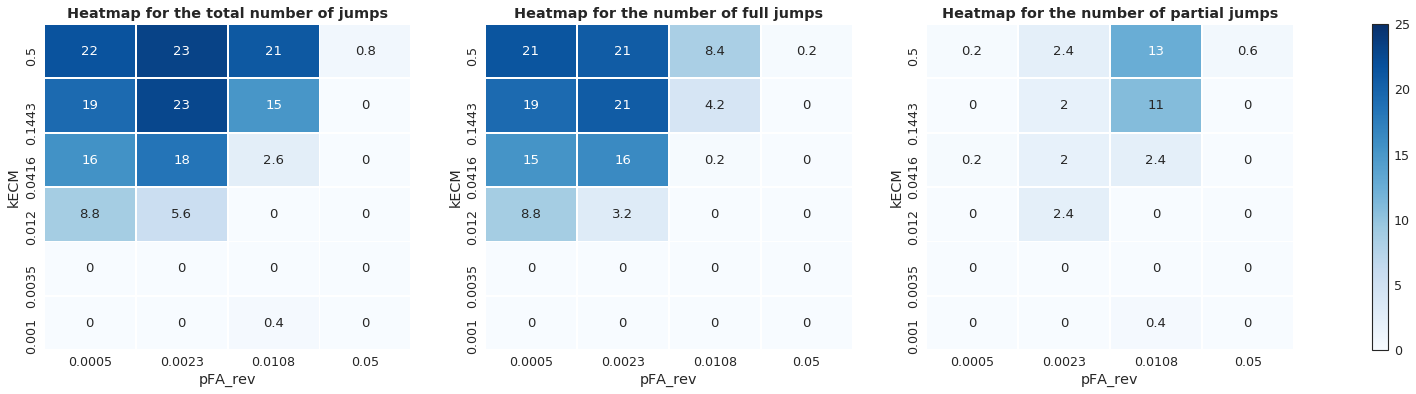

In [122]:
### PLOT HEATMAP OF NUMBER OF JUMPS ###

# Get mean of all simulations
new_jumps_df = jumps_info.groupby('samp_num')['jumps_num'].mean()
new_full_jumps_df = jumps_info.groupby('samp_num')['full_jump_num'].mean()
new_partial_jumps_df = jumps_info.groupby('samp_num')['partial_jump_num'].mean()

# Create a new DataFrame with this new data
new_jumps_df = pd.merge(new_jumps_df, new_full_jumps_df, on='samp_num')
new_jumps_df = pd.merge(new_jumps_df, new_partial_jumps_df, on='samp_num')
new_jumps_df = pd.merge(new_jumps_df, params, on='samp_num')

# Figure definition
fig, axes = plt.subplots(1,3)
fig.set_figwidth(28)
fig.set_figheight(6)

# Creating the heatmaps
jump_heatmap = new_jumps_df.pivot('kECM', 'pFA_rev', 'jumps_num')
full_jump_heatmap = new_jumps_df.pivot('kECM', 'pFA_rev', 'full_jump_num')
partial_jump_heatmap = new_jumps_df.pivot('kECM', 'pFA_rev', 'partial_jump_num')

# Plotting the heatmaps (saving colormap to plot colorbar afterwards)
im = sns.heatmap(jump_heatmap, cmap="Blues", linewidths = .9, annot = True, ax = axes[0], vmax = 25, cbar = False)
sns.heatmap(full_jump_heatmap, cmap="Blues", linewidths = .9, annot = True, ax = axes[1], vmax = 25, cbar = False)
sns.heatmap(partial_jump_heatmap, cmap="Blues", linewidths = .9, annot = True, ax = axes[2], vmax = 25, cbar = False)

# Figure aesthetics
axes[0].invert_yaxis()
axes[0].set_title('Heatmap for the total number of jumps', fontweight = 'bold')
axes[1].invert_yaxis()
axes[1].set_title('Heatmap for the number of full jumps', fontweight = 'bold')
axes[2].invert_yaxis()
axes[2].set_title('Heatmap for the number of partial jumps', fontweight = 'bold')

# Colorbar
mappable = im.get_children()[0]
plt.colorbar(mappable, ax=axes)

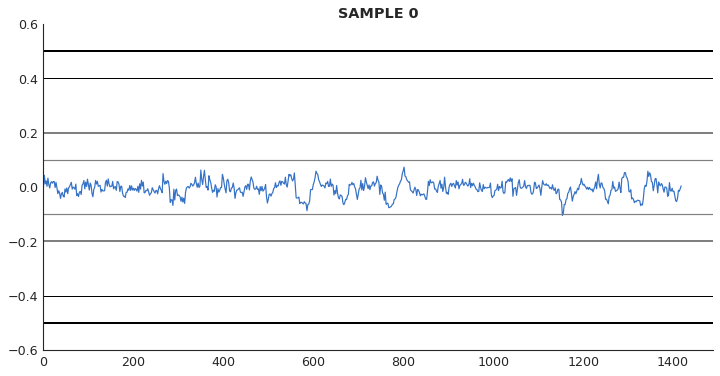

In [22]:
fig = plt.figure(figsize=(12,6))
sns.set_style('white')
num_s = 0

plt.plot(data['time'][data['sim_num'] == 1][data['samp_num'] == 1],data['diff_disp'][data['sim_num'] == 1][data['samp_num'] == num_s])
plt.axhline(.5, color = 'black', linewidth=2)
plt.axhline(-.5, color = 'black', linewidth=2)
plt.axhline(.4, color = 'black', linewidth=1)
plt.axhline(-.4, color = 'black', linewidth=1)
plt.axhline(.2, color = 'gray', linewidth=2)
plt.axhline(-.2, color = 'gray', linewidth=2)
plt.axhline(.1, color = 'gray')
plt.axhline(-.1, color = 'gray')
plt.ylim(-.6,.6)
plt.xlim(0, None)
plt.title('SAMPLE ' + str(num_s), weight = 'bold')
sns.despine()

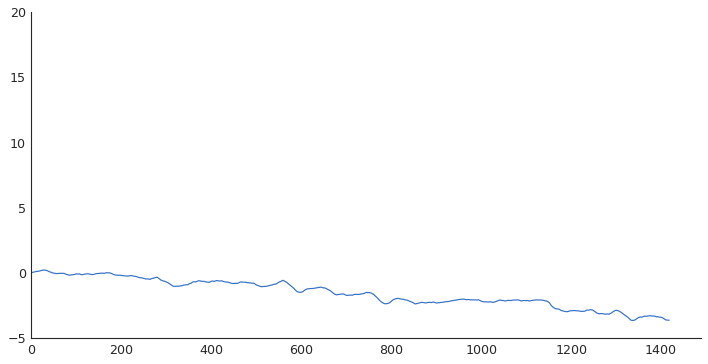

In [23]:
fig = plt.figure(figsize=(12,6))
plt.plot(data['time'][data['sim_num'] == 1][data['samp_num'] == 1], data['sum_disp'][data['sim_num'] == 1][data['samp_num'] == num_s])
plt.ylim(-5,20)
plt.xlim(0, None)
sns.despine()